# Setting Up the Problem

#### Objective: Understand and establish the baseline for your chosen dataset

In [257]:
import datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## OWN FUNCTIONS
#import support_functions
#from support_functions import *

In [258]:
### Support Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher
import spacy

#python -m spacy download en_core_web_sm - Run on Terminal
nlp = spacy.load("en_core_web_sm")

# Create a new Matcher
matcher = Matcher(nlp.vocab)


## Class Proportion

def class_prop(label):
    train_class = pd.Series(label).value_counts().reset_index()
    #Rename columns
    train_class.columns = ['class', 'count']
    train_class['total'] = train_class['count'].sum()
    train_class['perc'] = train_class['count']/train_class['total']
    print(train_class[['class','count','perc']].round(4))


## Function for Based-Rule classifier
def classify_text(text):
    doc = nlp(text)
    matches = matcher(doc)
    if matches:
        return matches  # Return the label of the first match
    else:
        return "UNKNOWN"  # If no match found


## Plot Metric Results

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class Metrics:
    def __init__(self):
        self.results = {}

    def run(self, y_true, y_pred, method_name, average='macro'):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f1 = f1_score(y_true, y_pred, average=average)

        # Store results
        self.results[method_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def plot(self):
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each metric
        for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
            ax = axs[i//2, i%2]
            values = [res[metric] * 100 for res in self.results.values()]
            ax.bar(self.results.keys(), values)
            ax.set_title(metric)
            ax.set_ylim(0, 100)

            # Add values on the bars
            for j, v in enumerate(values):
                ax.text(j, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

        plt.tight_layout()
        plt.show()


### DATA EXPLORATION
        
def freq_table(df,label):
    train_class = df[label].value_counts().reset_index()
    #Rename columns
    train_class.columns = ['category', 'count']
    train_class['total'] = train_class['count'].sum()
    train_class['perc'] = train_class['count']/train_class['total']
    return train_class[['category','count','perc']].round(4)

In [259]:
df = load_dataset("carblacac/twitter-sentiment-analysis")

/Users/mikelgallo/anaconda3/envs/text_2/lib/python3.12/site-packages/datasets/load.py:1461: FutureWarning: The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


### Characteristics of the dataset

**b. Dataset Description (0.5 points): Provide a brief overview of your dataset, including size, class distribution, and any peculiar characteristics. Include basic descriptive statistics.**

##### TSATC: Twitter Sentiment Analysis Training Corpus     
Original DATASET contains 1,578,627 classified tweets (1 for positive and 0 for negative sentiment).

Our dataset has already been randomly sampled, cleaned, and split into training and testing sets. Both positive and negative classes are well balanced within each subset, and the training subset has been further divided into an 80% training set and a 20% validation set.  

This dataset is an aggregation of two twitter sentiment analysis datasets:  
- University of Michigan Sentiment Analysis competition on Kaggle: https://inclass.kaggle.com/c/si650winter11  
- Twitter Sentiment Corpus by Niek Sanders: http://www.sananalytics.com/lab/twitter-sentiment/

  
Languages: English

In [260]:
## Defining train, validation and test sets
train_data = df['train']['text']
train_labels = df['train']['feeling']

validation_data = df['validation']['text']
validation_labels = df['validation']['feeling']

test_data = df['test']['text']
test_labels = df['test']['feeling']

## Creating Dataframes
df_train = pd.DataFrame({'text':train_data,'label':train_labels})
df_val = pd.DataFrame({'text':validation_data,'label':validation_labels})
df_test = pd.DataFrame({'text':test_data,'label':test_labels})

df

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

### Dataset size

In [261]:
total_rows = len(train_labels) + len(test_labels) + len(validation_labels)
# Calculate train size including validation
Train_size = len(train_labels) + len(validation_labels)
# Calculate Summary
summary_df = pd.DataFrame({'SET': ['TRAIN','TEST', 'TOTAL'], 'ROWS': [Train_size, len(test_labels), total_rows], 'SPLIT': [Train_size/total_rows, len(test_labels)/total_rows,total_rows/total_rows]})
print('Dataset Split [TRAIN, TEST]')
display(summary_df.round(3))

## TRAIN SPLIT
summary_df_train = pd.DataFrame({'SET': ['train','validation', 'TRAIN'], 'ROWS': [len(train_labels), len(validation_labels), Train_size], 'SPLIT': [len(train_labels)/Train_size, len(validation_labels)/Train_size,Train_size/Train_size]})
print('TRAIN Split [train, validation]')
display(summary_df_train.round(3))

Dataset Split [TRAIN, TEST]


,SET,ROWS,SPLIT
0,TRAIN,149985,0.708
1,TEST,61998,0.292
2,TOTAL,211983,1.000


TRAIN Split [train, validation]


,SET,ROWS,SPLIT
0,train,119988,0.8
1,validation,29997,0.2
2,TRAIN,149985,1.0


### Class distribution

In [262]:
## Class balance of our datasets
print('train')
class_prop(train_labels)
print('validation')
class_prop(validation_labels)
print('test')
class_prop(test_labels)

train
   class  count    perc
0      1  60019  0.5002
1      0  59969  0.4998
validation
   class  count    perc
0      0  15050  0.5017
1      1  14947  0.4983
test
   class  count    perc
0      1  31029  0.5005
1      0  30969  0.4995


### Distribution of text lengths (train set only)

In [263]:
df_train['text_length']= [len(i.split()) for i in df_train['text']]
df_val['text_length']= [len(i.split()) for i in df_val['text']]
df_test['text_length']= [len(i.split()) for i in df_test['text']]
#Calculating Answer Length

In [264]:
for i in df_train['text'][0:5]:
    print(i.split(),'length: ', len(i.split()) )

['@fa6ami86', 'so', 'happy', 'that', 'salman', 'won.', 'btw', 'the', '14sec', 'clip', 'is', 'truely', 'a', 'teaser'] length:  14
['@phantompoptart', '.......oops....', 'I', 'guess', "I'm", 'kinda', 'out', 'of', 'it....', 'Blonde', 'moment', '-blushes-', 'epic', 'fail'] length:  14
['@bradleyjp', 'decidedly', 'undecided.', 'Depends', 'on', 'the', 'situation.', 'When', "I'm", 'out', 'with', 'the', 'people', "I'll", 'be', 'in', 'Chicago', 'with?', 'Maybe.'] length:  19
['@Mountgrace', 'lol', 'i', 'know!', 'its', 'so', 'frustrating', 'isnt', 'it?!'] length:  9
['@kathystover', "Didn't", 'go', 'much', 'of', 'any', 'where', '-', 'Life', 'took', 'over', 'for', 'a', 'while'] length:  14


Summary Statistics of text_length for positive(1) and negative(0) tweets
            mean  median       std  min  max
label                                       
0      13.730761    13.0  7.035053    1   57
1      12.862760    12.0  6.810572    1  111
   
Plot text_length distribution for positive(1) and negative(0) tweets


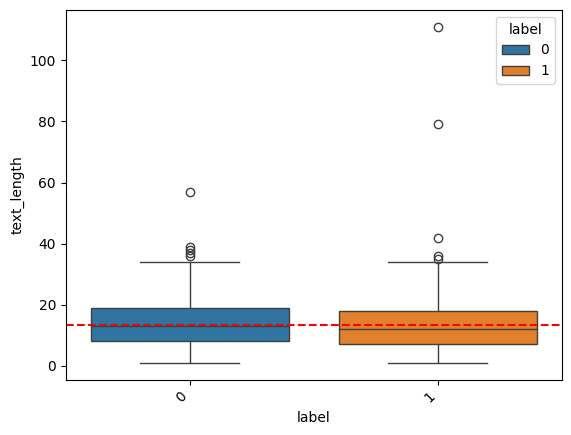

In [265]:
## Summary statistics for text_length
# Calculate multiple statistics
print('Summary Statistics of text_length for positive(1) and negative(0) tweets')
statistics = df_train.groupby('label')['text_length'].agg(['mean', 'median','std', 'min', 'max'])
# Display the result
print(statistics)

print('   ')

print('Plot text_length distribution for positive(1) and negative(0) tweets')
sns.boxplot(data=df_train, x='label', y='text_length',hue = 'label')
#plt.xlim(0, None)
plt.xticks(rotation=45, ha='right')
# Add a horizontal line at the mean of 'reply_length'
mean_reply_length = df_train['text_length'].mean()
plt.axhline(y=mean_reply_length, color='red', linestyle='--', label=f'Mean text Length ({mean_reply_length:.2f})')
# Show the plot
plt.show()

## Data Cleaning
Twitter text requires multiple transformations prior to Preprocessing

In [266]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons


# Create a TextPreProcessor instance
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
               'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
              'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used for word segmentation
    segmenter="twitter",
    # corpus from which the word statistics are going to be used for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text, with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons],
    #Remove emoticon
    pre_processor=[lambda x: x.replace('＼(^o^)／', '')]
)

# Pre-process the sentence using TextPreProcessor

def extract_clean(text):
    cleaned_text = ' '.join([word.split('<')[0] for word in text])
    return cleaned_text

def extract_emotions(text):
    emoji_expressions = [token for token in text if token in emoticons.values()]
    return emoji_expressions

def clean_string(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

def flatten_emotions(emotion_list):
    # Convert the list of emotions into a string
    emotion_string = ', '.join(emotion_list)
    # Use regular expression to find all words inside angle brackets
    emotions = re.findall(r'<([^>]*)>', emotion_string)
    unique_emotions = list(set(emotions))
    combined_emotions = ', '.join(unique_emotions)
    return combined_emotions


def clean_text(df):
# Pre-process all the sentences in df_train['text']
    df['preprocessed_text'] = [text_processor.pre_process_doc(text) for text in df['text']]
    df['clean_text'] = df['preprocessed_text'].apply(extract_clean).apply(clean_string)

    #Getting Hashtags
    df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
    df['hashtag'] = [' '.join(i) for i in df['hashtag']]

    # Iterate through the preprocessed text
    df['emotions'] = df['preprocessed_text'].apply(extract_emotions)
    df['clean_emotions'] = df['emotions'].apply(flatten_emotions)

    df = df[['text','label','text_length','clean_text','clean_emotions','hashtag']]
    return df

df_train = clean_text(df_train)
df_val = clean_text(df_val)
df_test = clean_text(df_test)


Reading twitter - 1grams ...
Reading twitter - 2grams ...


Reading twitter - 1grams ...


## DATA EXPLORATION

#### Hashtags

- 98% of the tweets have no hashtags. Most likely they have been already cleaned.
- Doesn't make sense to keep diving for more insigths.

In [267]:
hashtag_freq = freq_table(df_train,'hashtag')
hashtag_freq = hashtag_freq.sort_values(by='perc',ascending=False)
hashtag_freq['accum'] = hashtag_freq['perc'].cumsum()
print('top 10 hashtags')
display(hashtag_freq[0:10])

top 10 hashtags


,category,count,perc,accum
0,,117261,0.9773,0.9773
1,followfriday,151,0.0013,0.9786
2,fb,149,0.0012,0.9798
3,squarespace,68,0.0006,0.9804
4,FF,39,0.0003,0.9807
5,1,38,0.0003,0.9810
9,iranelection,20,0.0002,0.9812
11,2,18,0.0002,0.9814
10,BSB,19,0.0002,0.9816
12,iremember,18,0.0002,0.9818


#### EMOTIONS

- 98% of the tweets have no emotions. Most likely have been already removed.
- Because they directly express the sentiment of the text, we'll concatenate them to our cleaned tweet corpus.

In [268]:
emotions_freq = freq_table(df_train,'clean_emotions')
emotions_freq = emotions_freq.sort_values(by='perc',ascending=False)
emotions_freq['accum'] = emotions_freq['perc'].cumsum()
print('top 10 emotions')
display(emotions_freq[0:10])

top 10 emotions


,category,count,perc,accum
0,,117325,0.9778,0.9778
1,wink,640,0.0053,0.9831
2,annoyed,507,0.0042,0.9873
3,sad,404,0.0034,0.9907
4,laugh,383,0.0032,0.9939
5,happy,274,0.0023,0.9962
6,tong,205,0.0017,0.9979
7,surprise,146,0.0012,0.9991
8,kiss,33,0.0003,0.9994
31,"laugh, annoyed",1,0.0000,0.9994


In [269]:
#Concatenate text with emotions
df_train['text_emotion'] = df_train['clean_text']+' '+df_train['clean_emotions']
df_val['text_emotion'] = df_val['clean_text']+' '+df_val['clean_emotions']
df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


### Preprocessor

In [270]:
#Defining preprocessing class to be included in Pipeline later.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import string
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


## Text mining - Preprocessing, CountVectorizing and tf-idf

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = []
        for text in X:
            # Convert text to lowercase
            #text = text.lower()
            text = "".join([char.lower() for char in text if char not in string.punctuation]) 
            # Tokenize text
            tokens = word_tokenize(text)
            # Remove stopwords and apply lemmatization
            filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
            # Join tokens back into a string
            preprocessed_text = ' '.join(filtered_tokens)
            preprocessed_texts.append(preprocessed_text)

        return preprocessed_texts


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [271]:
sent = ['hello . ! my name is! test .. wuhoo']
pre =TextPreprocessor()
pre.fit(sent)
res = pre.transform(sent)
res

['hello name test wuhoo']

#### Exploring positive and negative words using WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


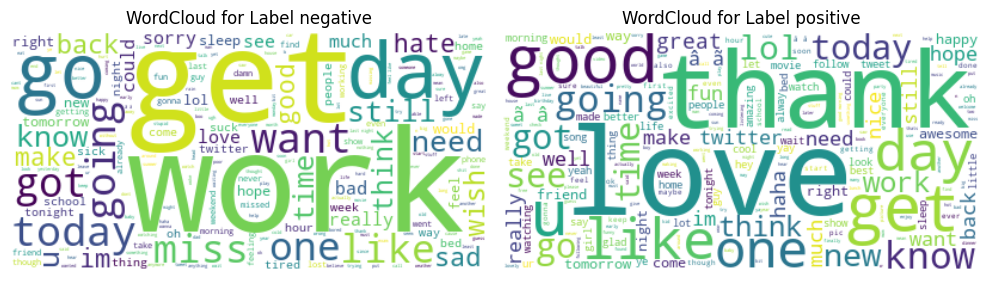

In [272]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_train['clean_text'], df_train['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

## Exploring positive and negative words using TF-IDF + LDA

In [273]:
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train['clean_text'])



Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

### TF-IDF Score

In [274]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df

# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

238


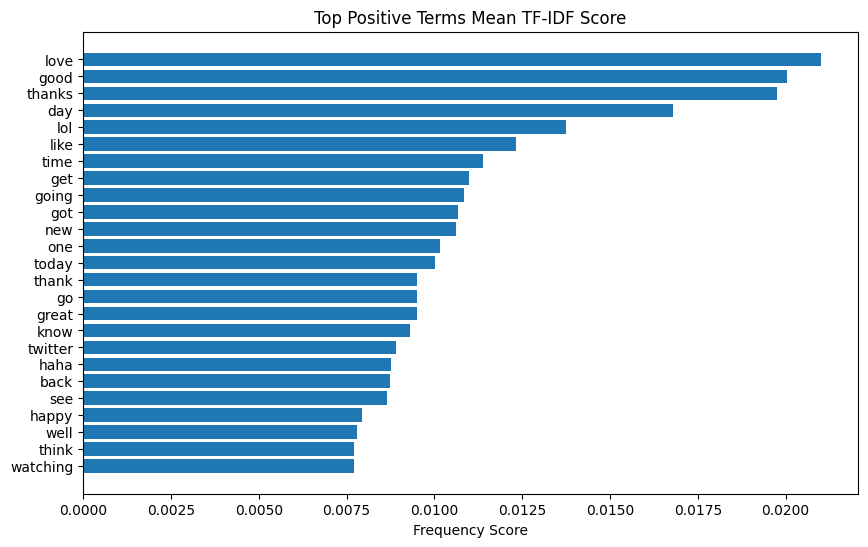

In [275]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

238


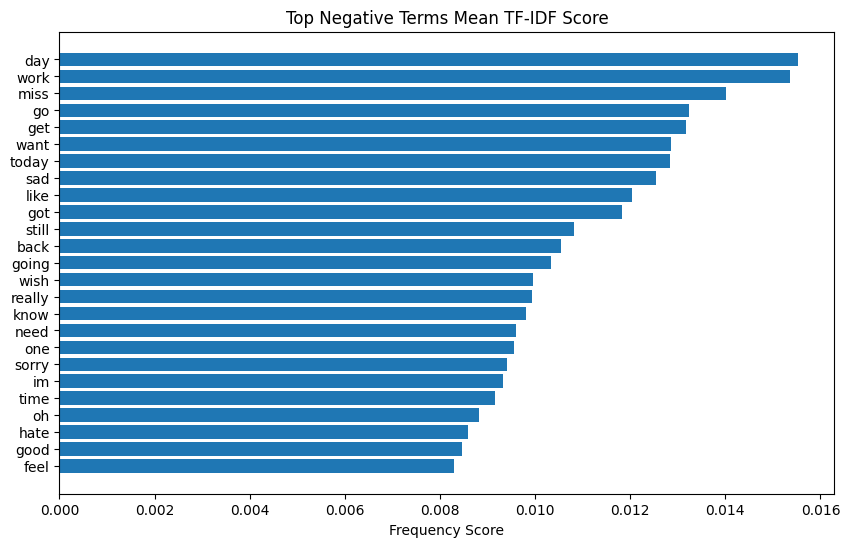

In [276]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

### Analyzing Both Positive and Negative Most Common Topics

In [277]:
from sklearn.decomposition import LatentDirichletAllocation
# Specify the number of topics (adjust as needed)
num_topics = 10
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

##Creating matrix
tf_idf_pos_matrix = pipeline.transform(df_train[df_train['label']==1]['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=pos_feature_names)

# Fit the model to your TF-IDF matrix
lda.fit(tfidf_mtx)

LatentDirichletAllocation(random_state=42)

In [278]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


# Print top words for each topic
print_top_words(lda, pos_feature_names, n_top_words=10)

Topic #1: thanks, great, awesome, yay, know, well, week, working, next, also
Topic #2: nice, fun, night, cool, let, make, ok, last, wow, bed
Topic #3: love, haha, day, want, say, think, first, hi, cute, sound
Topic #4: happy, oh, right, need, amazing, finally, still, ya, watch, try
Topic #5: like, hey, yeah, girl, little, made, guy, people, game, work
Topic #6: good, best, life, please, looking, na, ur, music, thing, keep
Topic #7: watching, back, tweet, home, look, show, get, would, soon, aw
Topic #8: thank, twitter, yes, today, going, got, time, movie, song, im
Topic #9: new, see, wait, come, way, glad, take, excited, beautiful, hour
Topic #10: lol, morning, go, one, birthday, friend, tonight, getting, follow, good


In [279]:
def get_top_words(model, feature_names, n_top_words):
    top_words_per_topic = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        top_words_per_topic.append(top_words)
    return top_words_per_topic

# Get top words for each topic
top_words_per_topic = get_top_words(lda, pos_feature_names, n_top_words=10)
# Extract words from list of lists
top_pos_words = [word for sublist in top_words_per_topic for word in sublist]

# Remove duplicates using set()
unique_pos = set(top_pos_words)

In [280]:
# Specify the number of topics (adjust as needed)
num_topics = 10
# Initialize LDA model
lda2 = LatentDirichletAllocation(n_components=num_topics, random_state=42)

##Creating matrix
tf_idf_neg_matrix = pipeline.transform(df_train[df_train['label']==0]['clean_text'])
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_neg_matrix.toarray(), columns=neg_feature_names)

# Fit the model to your TF-IDF matrix
lda2.fit(tfidf_mtx)

LatentDirichletAllocation(random_state=42)

In [281]:
# Print top words for each topic
print_top_words(lda2, neg_feature_names, n_top_words=10)

Topic #1: know, working, sick, never, missed, week, well, gone, lot, next
Topic #2: miss, sorry, last, night, trying, find, yet, school, aww, hot
Topic #3: want, feel, think, day, say, dont, yeah, love, something, like
Topic #4: sad, hate, oh, need, still, right, tired, morning, cant, tomorrow
Topic #5: work, like, suck, feeling, bored, damn, left, look, really, nothing
Topic #6: wish, na, aw, already, omg, life, keep, gon, please, gon na
Topic #7: back, bad, could, home, lost, get, would, watching, show, car
Topic #8: got, twitter, today, time, going, much, im, year, thought, yes
Topic #9: sleep, hour, new, phone, missing, cold, come, exam, wait, take
Topic #10: hurt, go, ugh, getting, tonight, one, rain, house, bed, someone


In [282]:
# Get top words for each topic
topneg_words_per_topic = get_top_words(lda2, pos_feature_names, n_top_words=10)
# Extract words from list of lists
top_neg_words = [word for sublist in topneg_words_per_topic for word in sublist]

# Remove duplicates using set()
unique_neg = set(top_neg_words)

## Random Classifier Performance

Random Classifier Performance (0.25 points): Calculate the expected performance of a random classifier for your dataset to set a benchmark. The calculation should include an implementation.

**pending**: include preprocessing in the pipeline to properly treat tweets.

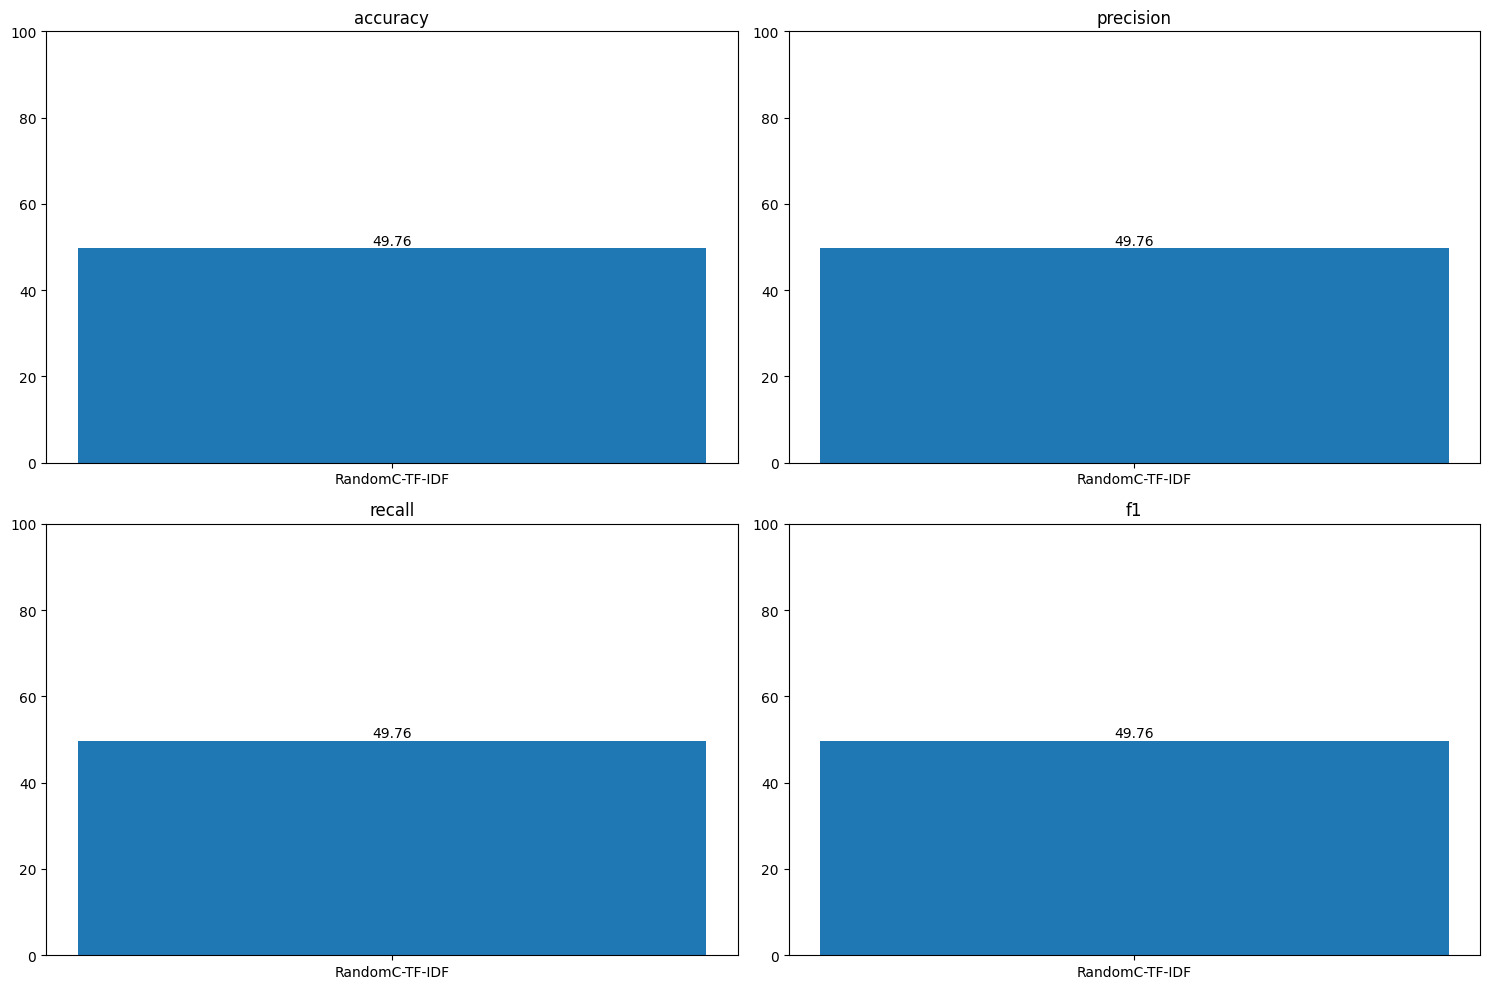

In [284]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier

pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the classifier to the training data
pipeline.fit(df_train['clean_text'])
##Creating matrix
tf_idf_matrix = pipeline.transform(df_train['clean_text'])
val_idf_matrix = pipeline.transform(df_test['clean_text']) #Changed validation for test
# Convert count matrix to DataFrame
tfidf_mtx = pd.DataFrame(data=tf_idf_matrix.toarray(), columns=pipeline.named_steps['vect'].get_feature_names_out())
val_mtx = pd.DataFrame(data=val_idf_matrix.toarray(), columns=pipeline.named_steps['vect'].get_feature_names_out())

##Innitializing RandomClassifier
dummy_classifier = DummyClassifier(strategy='uniform')
# Fit the classifier to the training data
dummy_classifier.fit(tfidf_mtx, df_train['label'])

# Make predictions on the testing data
y_pred = dummy_classifier.predict(val_mtx)

# Calculate accuracy (or any other metric)
metrics_val= Metrics()
metrics_val.run(test_labels, y_pred, "RandomC-TF-IDF")
metrics_val.plot()


## Baseline Implementation

Baseline Implementation (0.5 points): Develop a rule-based classifier as a baseline. Discuss its performance in the context of the dataset's complexity and compare it with human-level performance if available.

### Rule-Based using Spacy Matcher

In [285]:
## Call positive words from Positive LDA
print(unique_pos)

{'twitter', 'aw', 'song', 'ur', 'watching', 'thank', 'hi', 'ya', 'cute', 'yeah', 'got', 'best', 'made', 'happy', 'wait', 'hour', 'oh', 'finally', 'want', 'game', 'working', 'haha', 'take', 'go', 'girl', 'right', 'music', 'also', 'one', 'soon', 'amazing', 'way', 'fun', 'sound', 'last', 'see', 'week', 'well', 'movie', 'looking', 'great', 'im', 'know', 'friend', 'home', 'new', 'yay', 'love', 'day', 'make', 'lol', 'try', 'say', 'hey', 'excited', 'awesome', 'people', 'birthday', 'next', 'na', 'look', 'wow', 'would', 'morning', 'follow', 'little', 'ok', 'let', 'nice', 'like', 'get', 'life', 'getting', 'time', 'beautiful', 'first', 'watch', 'guy', 'work', 'think', 'thanks', 'come', 'bed', 'thing', 'please', 'back', 'need', 'cool', 'still', 'today', 'keep', 'show', 'going', 'tonight', 'night', 'tweet', 'yes', 'glad', 'good'}


In [286]:
## Get all the most relevant positive terms
positives = ['cute','aw','best','happy','haha',
             'amazing','fun','great','yay','love',
             'lol','excited','awesome','wow','nice','beautiful',
             'cool','glad','good']

print(positives)

['cute', 'aw', 'best', 'happy', 'haha', 'amazing', 'fun', 'great', 'yay', 'love', 'lol', 'excited', 'awesome', 'wow', 'nice', 'beautiful', 'cool', 'glad', 'good']


In [287]:
## Call negative words from Negative LDA
print(unique_neg)

{'twitter', 'find', 'car', 'aw', 'lost', 'sick', 'watching', 'hurt', 'tomorrow', 'yeah', 'got', 'something', 'wait', 'already', 'hour', 'oh', 'want', 'nothing', 'tired', 'hate', 'bad', 'working', 'go', 'take', 'damn', 'right', 'phone', 'someone', 'one', 'yet', 'never', 'omg', 'last', 'week', 'well', 'missing', 'feeling', 'really', 'exam', 'im', 'know', 'home', 'new', 'house', 'left', 'love', 'wish', 'could', 'day', 'gone', 'say', 'aww', 'next', 'look', 'na', 'gon', 'would', 'morning', 'year', 'hot', 'suck', 'dont', 'bored', 'like', 'get', 'rain', 'life', 'getting', 'missed', 'time', 'sorry', 'work', 'miss', 'think', 'ugh', 'sleep', 'cant', 'come', 'sad', 'bed', 'lot', 'please', 'gon na', 'trying', 'feel', 'back', 'need', 'still', 'cold', 'today', 'keep', 'show', 'going', 'tonight', 'night', 'school', 'yes', 'much', 'thought'}


In [288]:
## Get all the most relevant negative terms
negatives = ['sick','hurt','tired','hate','bad',
             'damn','never','miss','suck','sorry',
             'ugh','sad','lost', 'bored']

print(negatives)

['sick', 'hurt', 'tired', 'hate', 'bad', 'damn', 'never', 'miss', 'suck', 'sorry', 'ugh', 'sad', 'lost', 'bored']


### Implement rule-based conditions for our baseline model

In [289]:
import spacy
from spacy.matcher import Matcher

#loading and initializing nlp object
nlp = spacy.load('en_core_web_sm')
## Initializing Matcher
matcher = Matcher(nlp.vocab)

In [291]:
## Initializing Matcher
matcher = Matcher(nlp.vocab)

# based on word cloud
positive_patterns = [
    [{'LOWER': 'cute'}],
    [{'LOWER': 'aw'}],
    [{'LOWER': 'best'}],
    [{'LOWER': 'happy'}],
    [{'LOWER': 'haha'}],
    [{'LOWER': 'amazing'}],
    [{'LOWER': 'fun'}],
    [{'LOWER': 'great'}],
    [{'LOWER': 'yay'}],
    [{'LOWER': 'love'}],
    [{'LOWER': 'lol'}],
    [{'LOWER': 'excited'}],
    [{'LOWER': 'awesome'}],
    [{'LOWER': 'wow'}],
    [{'LOWER': 'nice'}],
    [{'LOWER': 'beautiful'}],
    [{'LOWER': 'cool'}],
    [{'LOWER': 'glad'}],
    [{'LOWER': 'good'}]
]


# based on word cloud
negative_patterns = [
    [{'LOWER': 'sick'}],
    [{'LOWER': 'hurt'}],
    [{'LOWER': 'tired'}],
    [{'LOWER': 'hate'}],
    [{'LOWER': 'bad'}],
    [{'LOWER': 'damn'}],
    [{'LOWER': 'never'}],
    [{'LOWER': 'miss'}],
    [{'LOWER': 'suck'}],
    [{'LOWER': 'sorry'}],
    [{'LOWER': 'ugh'}],
    [{'LOWER': 'sad'}],
    [{'LOWER': 'lost'}],
    [{'LOWER': 'bored'}]
]


## Adding patterns to matcher
matcher.add('positives',positive_patterns)
matcher.add('negatives',negative_patterns)


In [292]:
#Matching elements in documents
## Matching VALIDATION
docs_v = [nlp(doc) for doc in df_test['clean_text']]
matches_v = [matcher(d) for d in docs_v]

In [293]:
def matching_func(d,ms):
    #Return the index and the total number of matches per row
    rows_data = []
    for (i, match),doc in zip(enumerate(ms),d):
        #variables for defining current row/index
        row = 0
        row=i
        # positive variables
        positives = 0
        pos_w = []
        # negative variables
        negatives = 0
        neg_w = []

        diction = {'index':0,'total':0, 'positive':0 ,'negative':0,'pos_words':[],'neg_words':[]}
        # Filling dictionary
        diction['index'] = row
        diction['total'] = len(match)
        
        for match_id, start, end in match:
            if nlp.vocab.strings[match_id] == "positives":
                # store positive matched words
                pos_words = doc[start:end].text
                pos_w.append(pos_words)
                #diction['pos_words'] = pos_w
                # store number of positive words
                positives = len(pos_w)
                diction['positive'] = positives
            elif nlp.vocab.strings[match_id] == "negatives":
                # store negative matched words
                neg_words = doc[start:end].text
                neg_w.append(neg_words)
                #diction['neg_words'] = neg_w
                # store number of negative words
                negatives = len(neg_w)
                diction['negative'] = negatives
        
        #Add words matched to dictionary
        diction['pos_words'] = pos_w
        #diction['positive'] = positives
        diction['neg_words'] = neg_w
        #diction['negative'] = negatives

        diction = {k: np.nan if (not v and v != 0) else v for k, v in diction.items()}

        rows_data.append(diction)

    df = pd.DataFrame(rows_data)
    return df
        #print(diction['index'],' ',diction['total'],' ',diction['pos_words'],' ',diction['positive'],' ',diction['neg_words'],' ',diction['negative'])

In [294]:

va_df = matching_func(docs_v,matches_v)
va_df

,index,total,positive,negative,pos_words,neg_words
0,0,0,0,0,NaN,NaN
1,1,0,0,0,NaN,NaN
2,2,0,0,0,NaN,NaN
3,3,0,0,0,NaN,NaN
4,4,0,0,0,NaN,NaN
...,...,...,...,...,...,...
61993,61993,0,0,0,NaN,NaN
61994,61994,2,0,2,NaN,"[damn, lost]"
61995,61995,0,0,0,NaN,NaN
61996,61996,0,0,0,NaN,NaN


In [295]:
# Create a new column 'proba' where 1 is returned if positives are greater than negatives, else 0
threshold = 0.5

va_df['proba'] = np.where(va_df['total'] != 0, (va_df['positive'] / va_df['total']) > threshold, 0)
va_df

,index,total,positive,negative,pos_words,neg_words,proba
0,0,0,0,0,NaN,NaN,0
1,1,0,0,0,NaN,NaN,0
2,2,0,0,0,NaN,NaN,0
3,3,0,0,0,NaN,NaN,0
4,4,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...
61993,61993,0,0,0,NaN,NaN,0
61994,61994,2,0,2,NaN,"[damn, lost]",0
61995,61995,0,0,0,NaN,NaN,0
61996,61996,0,0,0,NaN,NaN,0


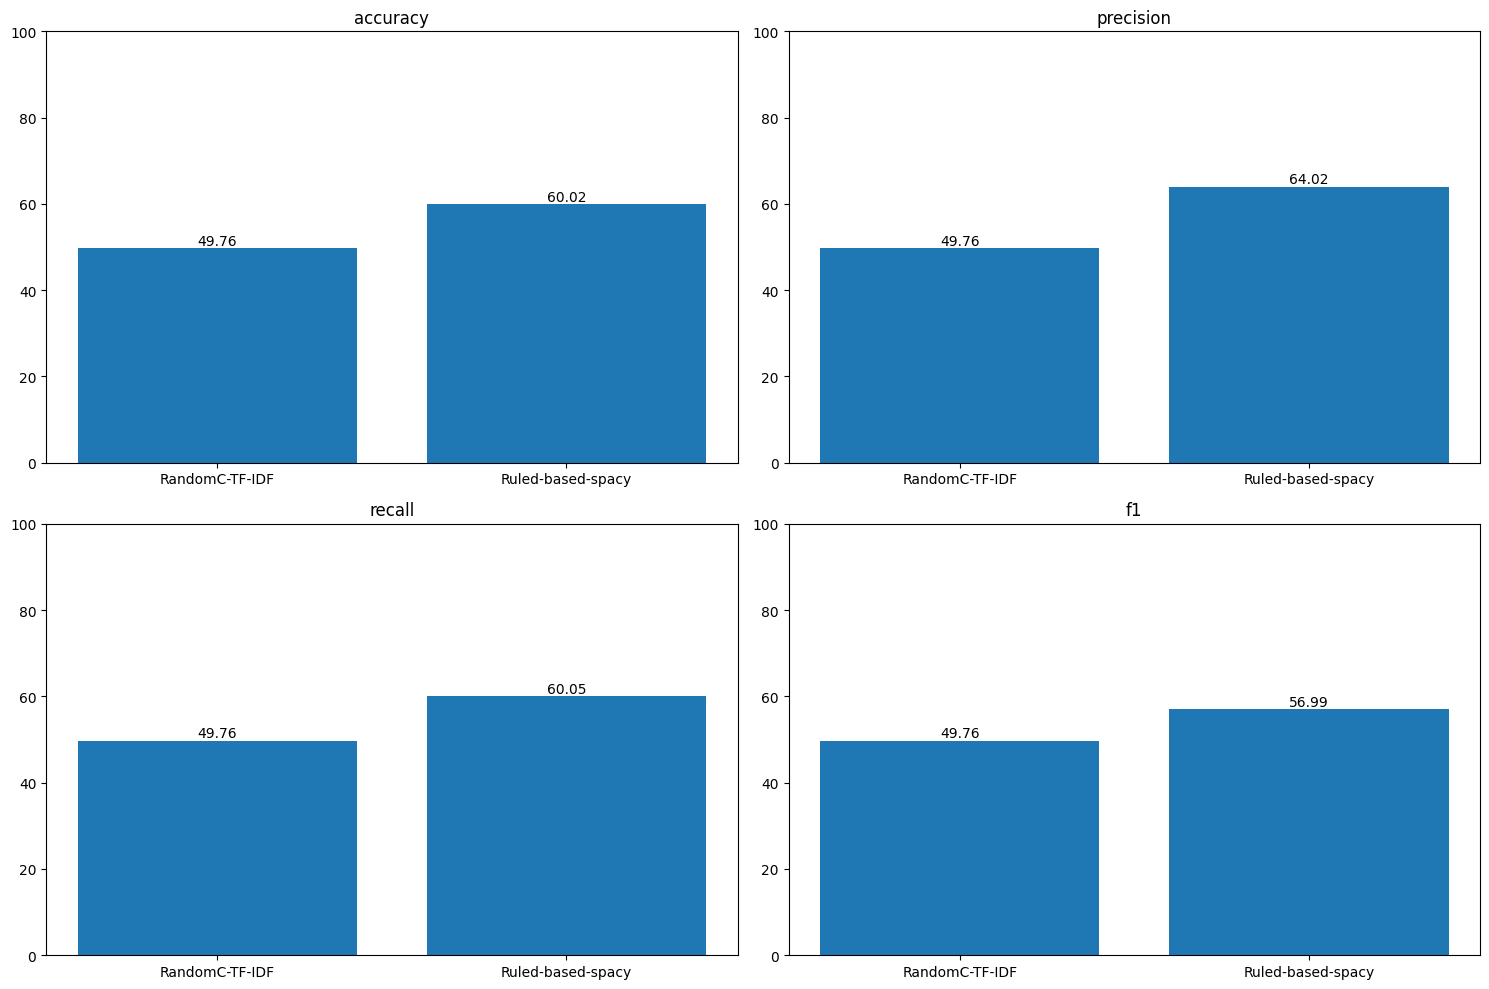

In [297]:
## Comparing with real 

metrics_val.run(test_labels, va_df['proba'], "Ruled-based-spacy")
metrics_val.plot()

### Error Analysis

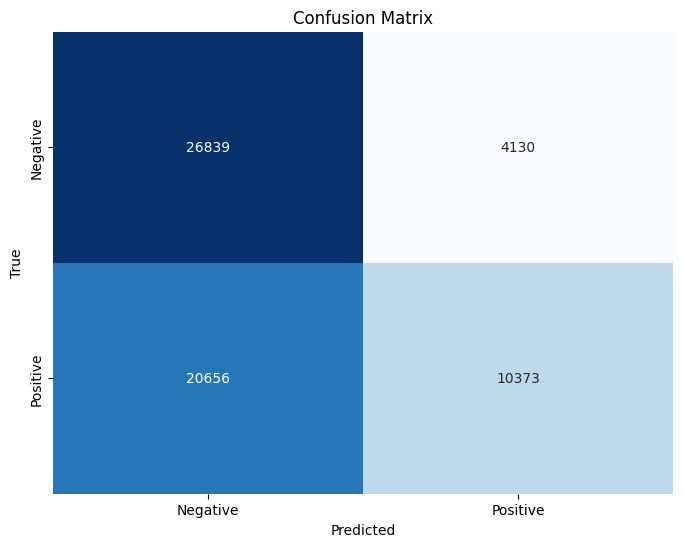

In [299]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, va_df['proba'])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [316]:
df_val2 = df_test.copy()

#Create an index column to join with our prediction results
df_val2 = df_val2.reset_index()

## Merge with new data
merged_data = df_val2.merge(va_df[['index','proba']],how='left',left_on='index',right_on='index',suffixes=['_tr','_df'])
merged_data.head()

,index,text,label,text_length,clean_text,clean_emotions,hashtag,text_emotion,proba
0,0,@justineville ...yeahhh. ) i'm 39 tweets from ...,1,8,. yeah . ) i am tweets from !,,,. yeah . ) i am tweets from !,0
1,1,@ApplesnFeathers aww. Poor baby! On your only ...,0,10,aww . poor baby ! on your only real day off .,,,aww . poor baby ! on your only real day off .,0
2,2,@joeymcintyre With my refunded $225 (Australia...,0,23,with my refunded ( australian ticket price ) i...,,,with my refunded ( australian ticket price ) i...,0
3,3,It's fine. Today sucks just because me those t...,0,16,it ' s fine . today sucks just because me thos...,,,it ' s fine . today sucks just because me thos...,0
4,4,"Im just chilling on psp and stuff, but sitting...",0,23,"im just chilling on psp and stuff , but sittin...",,,"im just chilling on psp and stuff , but sittin...",0


In [317]:
## Printing False Negatives
print('MISSCLASSIFIED TWEETS EXPLORATION')
for i in merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['clean_text'][0:25]:
    print(i)

MISSCLASSIFIED TWEETS EXPLORATION
. yeah . ) i am tweets from !
get followers a day using once you add everyone you are on the train or pay vip
heading off to bed . goodnight peeps
f cking tired after footbal tournament ! but goal , two penalty stops , one penalty in the high corner and a good free kick .
with a boyfriend like mine . i feel like the luckiest girl alive
it goes through phases . it was like that a few years ago , and it will cycle back into comics around the fall . hopefully .
a man can never have too many blazers . so i bought another one
thanks you guys for your help with my custom questions ! i really want her to turn out well . i really appreciate it .
s.o.l. = shit out of luck hahaha sorry
just got invited to a hallway party next weekend by our pothead neighbor . we will probably go .
a lot of us were gonna sleep , i am even in bed under the covers , but ur twittering , so no one ' s going to sleep . continue .
maybe . i donã ¯ â ¿ â½t know
you are so pretty you sho

#### How can we reduce the amount of false negatives?

Twitter data presents certain challenges:

- Frequently, we encounter questions that lack clear sentiment expression.
- Sometimes, the count of positive and negative instances is equal, leading to classification as negatives based on our threshold.
- Given the intricate variety of positive patterns, we won't be able to cover all possibilities, therefore increasing the number of false negatives.
- Positive and negative sarcasm further complicates accurate classification, as seen in examples like: "I live in a basement. That's why I am so mysterious."


Proposal to reduce False negatives  

To address the issue of false negatives, we suggest a strategy suited to the complexity of tweets, characterized by informal language. Our plan involves conducting regular error analyses and augmenting our matcher patterns with new positive patterns. This iterative approach aims to develop a robust classifier capable of capturing all positive patterns accurately over time. However, we must also devise methods to handle neutral tweets and positive/negative sarcasm.

- Our initial step entails identifying missing positive patterns within misclassified tweets and incorporating them into our matcher.





238


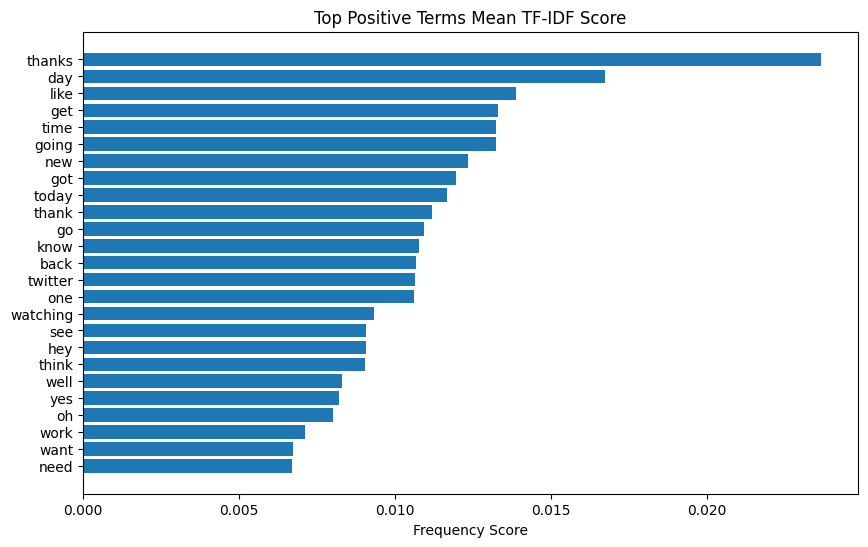

In [318]:
## Plot TFIDF identify missing positive patterns
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)],1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

In [319]:
#Identifying positive patterns:

positives2 = ['thanks','new','like','thank','well']

print(positives2)

['thanks', 'new', 'like', 'thank', 'well']


In [320]:
## Adding new patterns to matcher
# based on word cloud
positive_patterns2 = [
    [{'LOWER': 'thanks'}],
    [{'LOWER': 'new'}],
    [{'LOWER': 'like'}],
    [{'LOWER': 'thank'}],
    [{'LOWER': 'well'}]
]

## Adding patterns to matcher
matcher.add('positives',positive_patterns2)

In [321]:
#Matching elements in documents
## Matching VALIDATION
docs_v2 = [nlp(doc) for doc in merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['clean_text']]
matches_v2 = [matcher(d) for d in docs_v2]

In [322]:
va_df2 = matching_func(docs_v2,matches_v2)
va_df2

,index,total,positive,negative,pos_words,neg_words
0,0,0,0,0,NaN,NaN
1,1,0,0,0,NaN,NaN
2,2,0,0,0,NaN,NaN
3,3,2,1,1,[good],[tired]
4,4,2,2,0,"[like, like]",NaN
...,...,...,...,...,...,...
20651,20651,0,0,0,NaN,NaN
20652,20652,0,0,0,NaN,NaN
20653,20653,0,0,0,NaN,NaN
20654,20654,0,0,0,NaN,NaN


In [323]:
va_df2['proba'] = np.where(va_df2['total'] != 0, (va_df2['positive'] / va_df2['total']) > threshold, 0)
va_df2

,index,total,positive,negative,pos_words,neg_words,proba
0,0,0,0,0,NaN,NaN,0
1,1,0,0,0,NaN,NaN,0
2,2,0,0,0,NaN,NaN,0
3,3,2,1,1,[good],[tired],0
4,4,2,2,0,"[like, like]",NaN,1
...,...,...,...,...,...,...,...
20651,20651,0,0,0,NaN,NaN,0
20652,20652,0,0,0,NaN,NaN,0
20653,20653,0,0,0,NaN,NaN,0
20654,20654,0,0,0,NaN,NaN,0


In [324]:
## Checking That lens for both results match
print(len(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba']) == len(va_df2['proba']))
print(len(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba']))
print(len(va_df2['proba']))


True
20656
20656


In [325]:
#check if missing values
print(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba'].isna().mean())
print(va_df2['proba'].isna().mean())


0.0
0.0


In [326]:
# Different indexes
print(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)].index)
print(va_df2.index)

Index([    0,     8,    11,    13,    14,    18,    19,    21,    29,    31,
       ...
       61967, 61969, 61970, 61975, 61977, 61978, 61980, 61981, 61983, 61996],
      dtype='int64', length=20656)
RangeIndex(start=0, stop=20656, step=1)


In [327]:
# Make copies of the dataframes
merged_data_copy = merged_data.copy()
va_df2_copy = va_df2.copy()

# Find the subset indices in the copied dataframe


df_merge = pd.DataFrame({'index':merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)].index,
                         'proba1':(merged_data[(merged_data['label'] ==1)&(merged_data['proba'] ==0)]['proba']).tolist(),
                         'proba2':va_df2['proba'].tolist()
                         })

df_merge['proba3'] = np.where(df_merge['proba1'] != df_merge['proba2'], df_merge['proba2'], df_merge['proba1'])
df_merge.set_index('index', inplace=True)
df_merge


,proba1,proba2,proba3
index,,,
0,0,0,0
8,0,0,0
11,0,0,0
13,0,0,0
14,0,1,1
...,...,...,...
61978,0,0,0
61980,0,0,0
61981,0,0,0


In [328]:
#Now that we made sure that indexes will match, replace in merged data:
for index, value in zip(merged_data_copy[(merged_data_copy['label'] == 1) & (merged_data_copy['proba'] == 0)].index, df_merge['proba3']):
    merged_data_copy.loc[index, 'proba'] = value

---

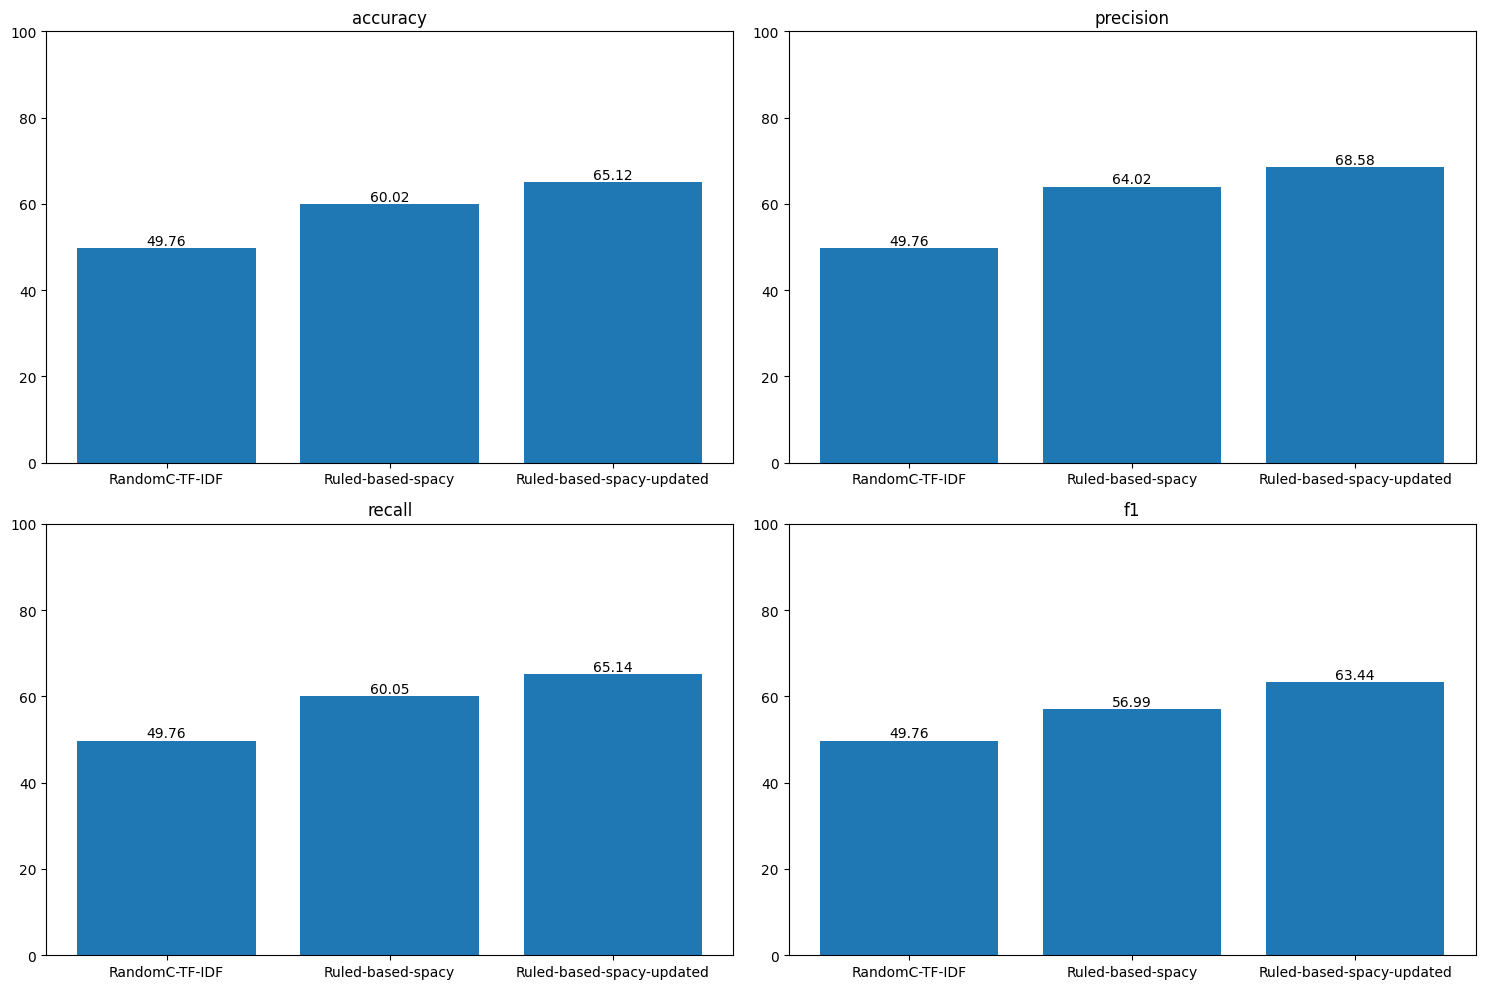

In [329]:
metrics_val.run(test_labels, merged_data_copy['proba'], "Ruled-based-spacy-updated")
metrics_val.plot()

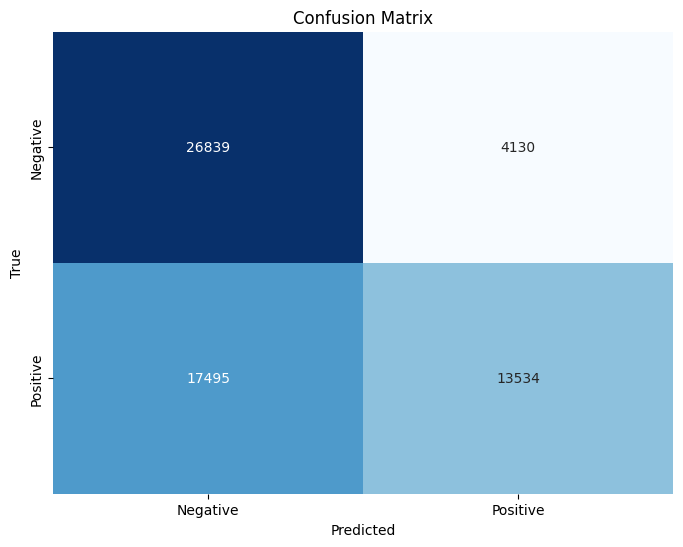

In [330]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels,  merged_data_copy['proba'])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [331]:
## Reduction of False Negatives
((17495 / 20656) -1) * 100

-15.303059643687067

#### We managed to reduce the number of false negatives by 15% after incorporating the new batch of positive patterns learned from the error analysis

### Rule-Based Benchmark with Vader

In [332]:
# Initialize the SentimentIntensityAnalyzer.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']

# Calculate compound score and get tweet length
df_test['sentiment'] = df_test['clean_text'].apply(function)
df_test['clean_length'] = [len(i.split()) for i in df_test['clean_text']]

test = df_test[['clean_text','clean_length','sentiment']]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mikelgallo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [333]:
#Adding Sentiment Label
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

df_test['sentiment_label'] = df_test['sentiment'].apply(getAnalysis)

#Scaling score to the length of the review
df_test.head(5)

,text,label,text_length,clean_text,clean_emotions,hashtag,text_emotion,sentiment,clean_length,sentiment_label
0,@justineville ...yeahhh. ) i'm 39 tweets from ...,1,8,. yeah . ) i am tweets from !,,,. yeah . ) i am tweets from !,0.3595,9,Positive
1,@ApplesnFeathers aww. Poor baby! On your only ...,0,10,aww . poor baby ! on your only real day off .,,,aww . poor baby ! on your only real day off .,-0.5255,12,Negative
2,@joeymcintyre With my refunded $225 (Australia...,0,23,with my refunded ( australian ticket price ) i...,,,with my refunded ( australian ticket price ) i...,0.0000,23,Neutral
3,It's fine. Today sucks just because me those t...,0,16,it ' s fine . today sucks just because me thos...,,,it ' s fine . today sucks just because me thos...,-0.1779,20,Negative
4,"Im just chilling on psp and stuff, but sitting...",0,23,"im just chilling on psp and stuff , but sittin...",,,"im just chilling on psp and stuff , but sittin...",0.3818,25,Positive


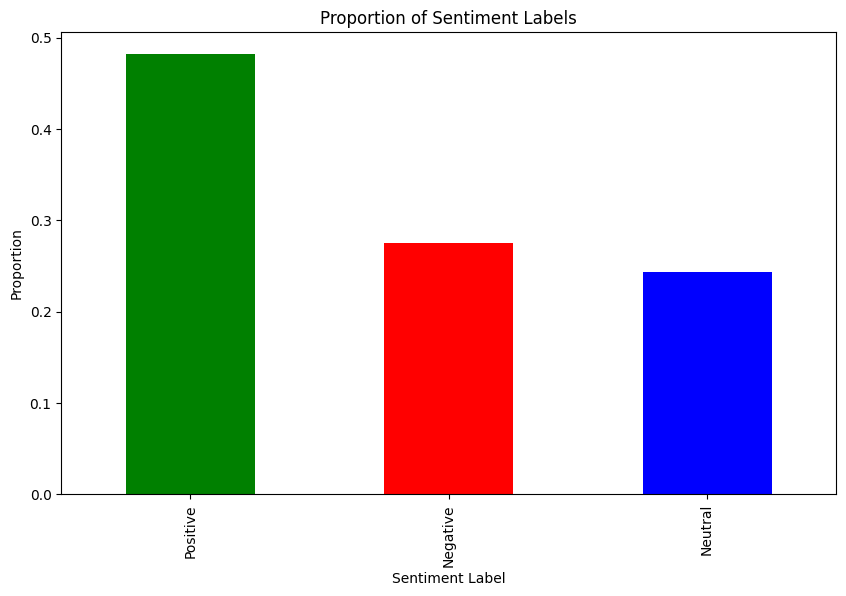

In [334]:
import matplotlib.pyplot as plt

# Get counts of each category in 'sentiment_label'
sentiment_counts = df_test['sentiment_label'].value_counts()

# Calculate proportion of each category
total_samples = len(df_test)
sentiment_proportions = sentiment_counts / total_samples

# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Plot bar chart with colors
sentiment_proportions.plot(kind='bar', figsize=(10, 6), color=[colors[label] for label in sentiment_proportions.index])

# Set labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment Labels')

# Show plot
plt.show()


## Looking at WordCloud for inspection of Neutral Words

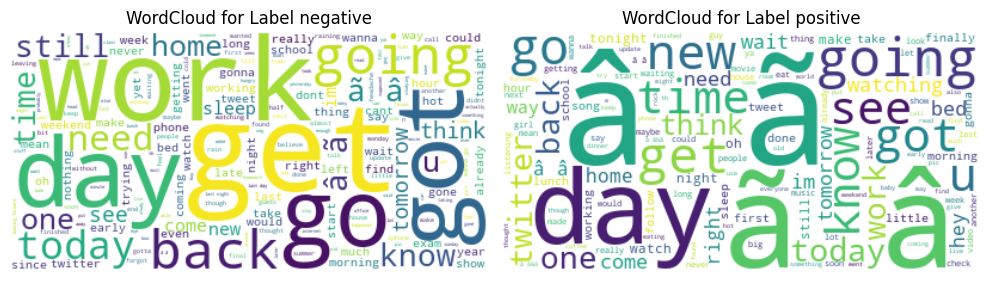

In [335]:
## Looking at a WordCloud to inspect the words in neutral

labels = {0: 'negative', 1: 'positive'}

# Prepare data for wordclouds
label_data = defaultdict(lambda: '')

for text, label in zip(df_test[df_test['sentiment_label']=='Neutral']['clean_text'], df_test[df_test['sentiment_label']=='Neutral']['label']):
    label_data[label] += text

# Generate and plot wordclouds for each label
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
axs = axs.flatten()  # Flatten the axis array

for ax, (label, text) in zip(axs, label_data.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Classifying Neutral tweets

In [336]:
#Clasifying neutral 
# Iterate over rows of DataFrame where 'sentiment_label' is 'Neutral'
for index, row in df_test[df_test['sentiment_label'] == 'Neutral'].iterrows():
    # Analyze sentiment of the text
    score = vader.polarity_scores(row['clean_text'])
    if score['compound'] == 0:  # Positive sentiment
        df_test.at[index, 'sentiment_label'] = 'Negative' ##Any tweet that has no good emotion will be treated as negative
    else:  # Neutral sentiment
        df_test.at[index, 'sentiment_label'] = 'Positive'


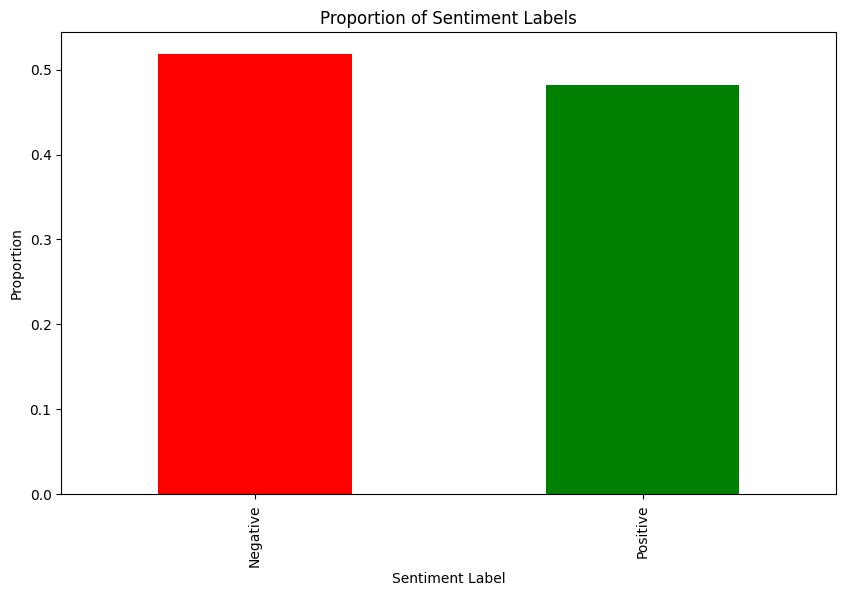

In [337]:
# Get counts of each category in 'sentiment_label'
sentiment_counts = df_test['sentiment_label'].value_counts()

# Calculate proportion of each category
total_samples = len(df_test)
sentiment_proportions = sentiment_counts / total_samples

# Define colors for each sentiment
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Plot bar chart with colors
sentiment_proportions.plot(kind='bar', figsize=(10, 6), color=[colors[label] for label in sentiment_proportions.index])

# Set labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment Labels')

# Show plot
plt.show()

### Rule-Based Model Performance

In [338]:
#Convert to binary
df_test['sentiment_label'] = [1 if x == 'Positive' else 0 for x in df_test['sentiment_label']]
y_pred = df_test['sentiment_label']
original_labels = df_test['label']

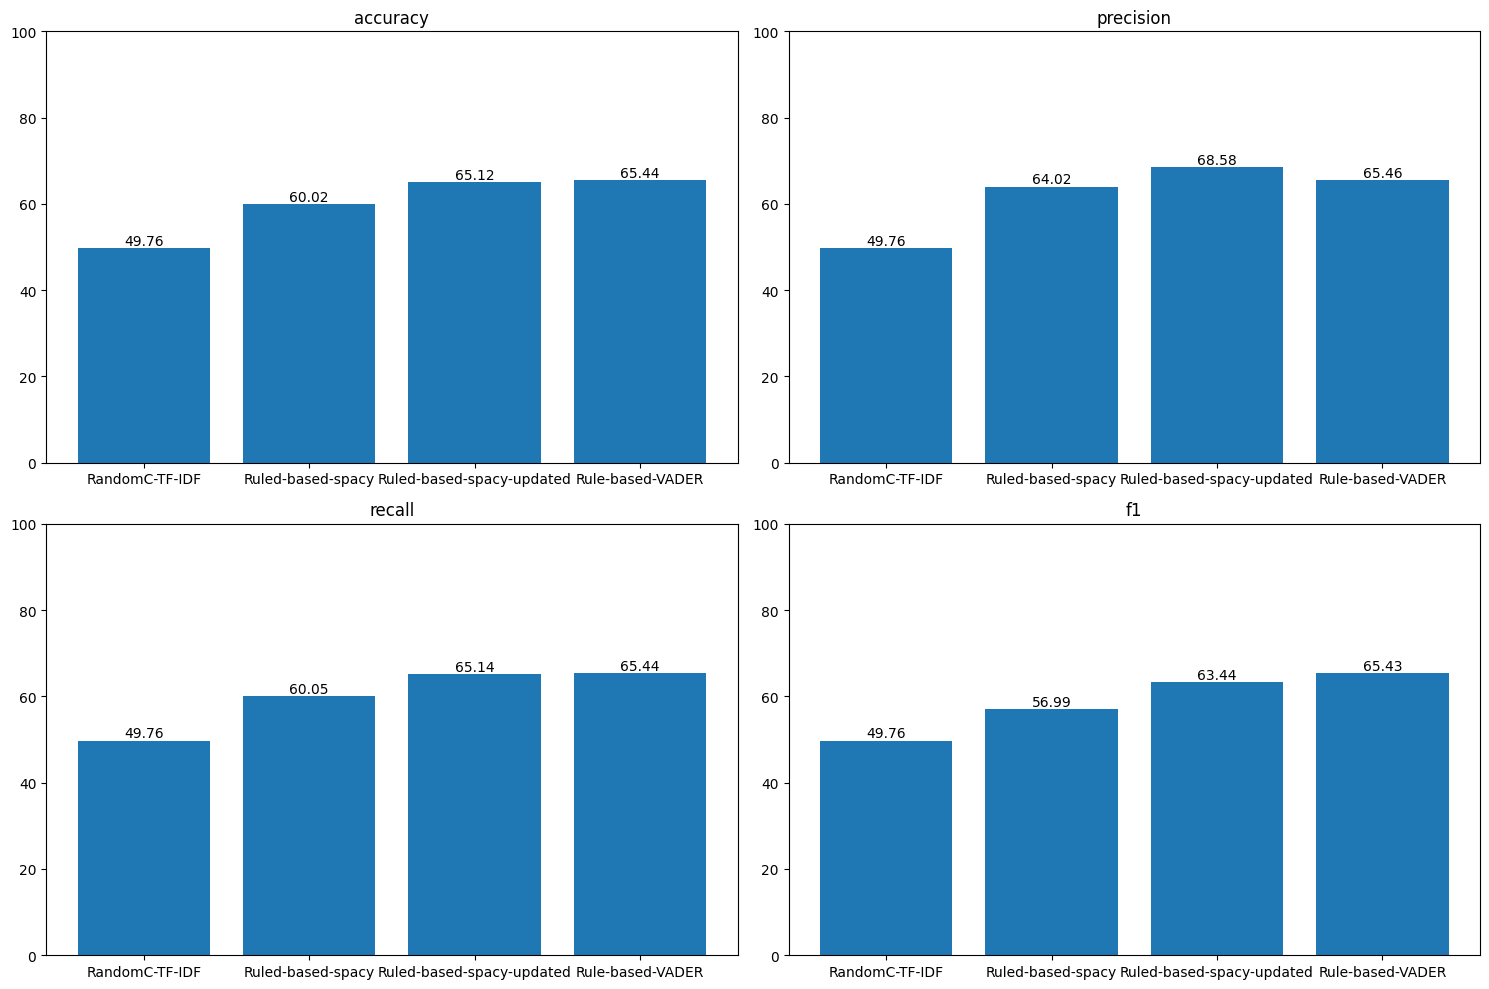

In [339]:
## Model Performance

metrics_val.run(original_labels, y_pred, "Rule-based-VADER")
metrics_val.plot()

---

# BERT Model with Limited Data (0.5 points)

#### Train a BERT-based model using only 32 labeled examples and assess its performance.

In the following exercises we will work with clean text.

In [ ]:
train_data_clean = df_train['clean_text']
validation_data_clean = df_val['clean_text']
test_data_clean = df_test['clean_text']

In [ ]:
# Set the seed for reproducibility
np.random.seed(42)

# First, we'll select 32 random rows from the DataFrame using the sample method.
df_train_32 = df_train.sample(n=32)

In [ ]:
train_data_32 = df_train_32['clean_text']
train_labels_32 = df_train_32['label']

### BERT SETUP

In [ ]:
checkpoint="cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)

batch_size=32 # impossible to have bigger batch as far as we have just 32 observations in the train
max_length=40 # fine for the length of the sentences in our dataset - changed it according to the distribution
rate = 0.5 # dropout parameters - tried different options, 0.5 still performs better
num_labels = len(np.unique(validation_labels))

In [ ]:
# ## Input
# input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
# input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# # Embedding layers
# embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
# # we need only the first token representation nothing else from the last layer
# final_embedding_layer = embedding_layer[0] #last layer of BERT
# # Extract only the [CLS] token's embeddings
# cls_token_embeddings = final_embedding_layer[:, 0, :]
# # First dimension is the number of rows
# # Second dimension is the number of tokens (in our case 64)
# # The last dimension is the embedding size, in this case 768

# # Let's add some dropout to reduce overfitting
# output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)

# # One dense layer to process the last layer
# output = tf.keras.layers.Dense(num_labels,
#                                kernel_initializer="glorot_uniform",
#                                activation='softmax')(output_layer)


# bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

# bert_model.summary()

In [ ]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras import regularizers

## Input
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Embedding layers
embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
# we need only the first token representation nothing else from the last layer
final_embedding_layer = embedding_layer[0] #last layer of BERT
# Extract only the [CLS] token's embeddings
cls_token_embeddings = final_embedding_layer[:, 0, :]
# First dimension is the number of rows
# Second dimension is the number of tokens (in our case 64)
# The last dimension is the embedding size, in this case 768

# Let's add some dropout to reduce overfitting
output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)

# One dense layer to process the last layer with L2 regularization
output = tf.keras.layers.Dense(num_labels,
                               kernel_initializer="glorot_uniform",
                               activation='softmax',
                               kernel_regularizer=regularizers.l2(0.01))(output_layer)

bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=output)

bert_model.summary()

In [ ]:
def get_batches(X_train, y_train, tokenizer, batch_size, max_length):
    """
    Objective: Create a generator that yields batches of tokenized text and corresponding labels.
               The data is shuffled and looped through indefinitely.

    Inputs:
        - X_train (np.array): Array of text data (features).
        - y_train (np.array): Array of labels.
        - tokenizer (DistilBertTokenizer): Tokenizer for text data.
        - batch_size (int): Size of each batch.
        - max_length (int): Maximum length of tokenized sequences.
    Outputs:
        - Generator yielding batches of (inputs, targets).
    """

    # Pre-tokenize the entire dataset
    inputs = tokenizer.batch_encode_plus(list(X_train), add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True,
                                         return_tensors="np")

    input_ids = np.asarray(inputs['input_ids'], dtype='int32')
    attention_masks = np.asarray(inputs['attention_mask'], dtype='int32')

    # Shuffle and yield batches
    while True:
        X_train, y_train, input_ids, attention_masks = shuffle(X_train, y_train, input_ids, attention_masks, random_state=11)

        for i in range(0, len(X_train), batch_size):
            yield [input_ids[i:i + batch_size], attention_masks[i:i + batch_size]], y_train[i:i + batch_size]

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(train_labels_32).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(train_data_32)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)


In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data_clean),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


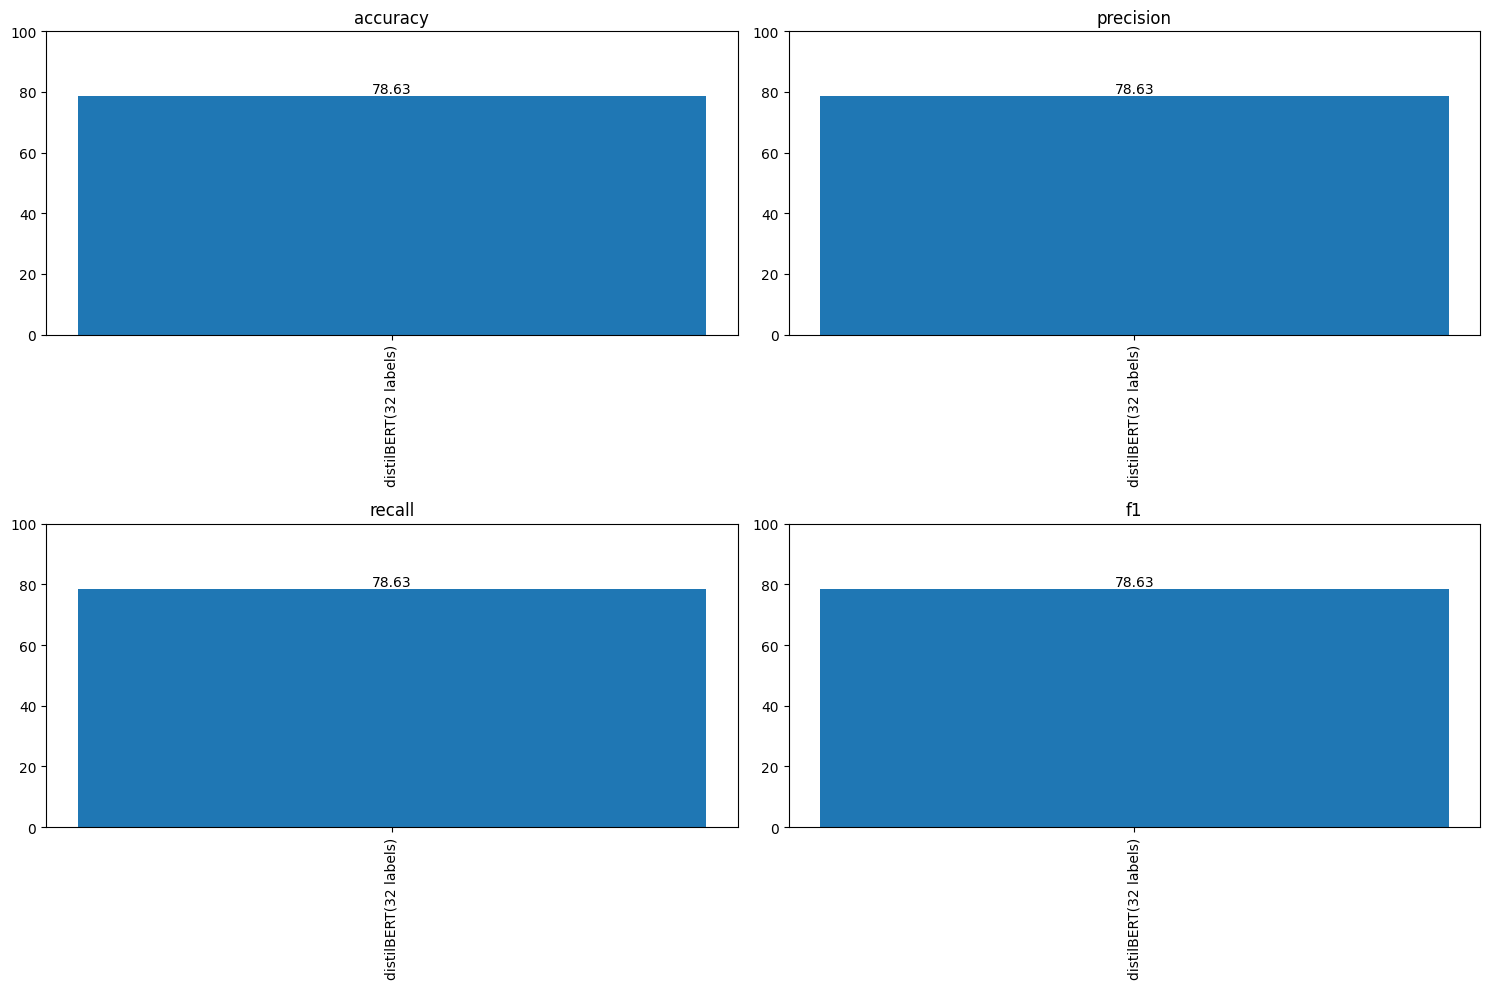

In [ ]:
# get the final metrics
metrics_val= Metrics()
metrics_val.run(test_labels, valid_preds, "distilBERT(32 labels)")
metrics_val.plot()

As we see, BERT trained on 32 labels performs slightly better than random. Note that metrics vary in the range [0.52, 0.62], depending on the run, as all batches are randomly assigned.

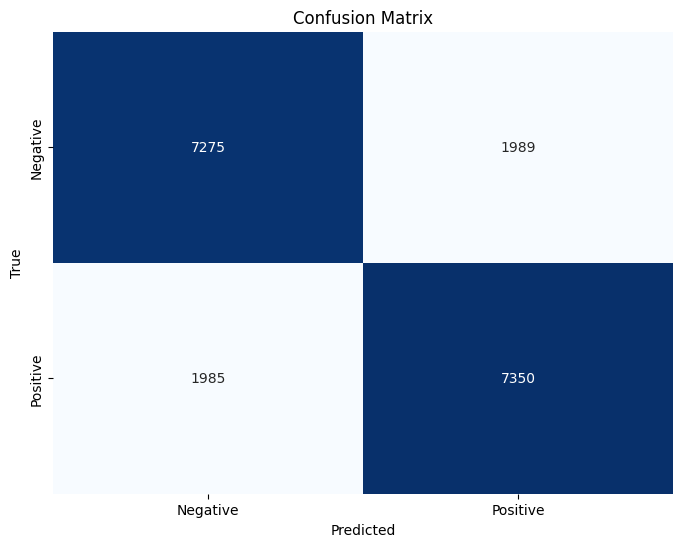

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels, valid_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Dataset Augmentation (1 point)

#### Experiment with an automated technique to increase your dataset size without using LLMs. Evaluate the impact on model performance.

In [ ]:
# This function should be moved to the top of the notebook (Mikel used it in the first exercise)
# Function for data preprocessing

#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

#additional functions

def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

#the following leaves in place two or more capital letters in a row
#will be ignored when using standard stemming
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

#modular pipeline for stemming, lemmatizing and lowercasing
#note this is NOT lemmatizing using grammar pos

def tokenize(text, modulation):
    if modulation<2:
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)


def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

### LDA
I performed some exploratory analysis (aka LDA), but as far as data is very small and randomly chosen to find any patterns is almost imposible and actually is not needed. Probably will just drop this part.

In [ ]:
# df_train_32['clean_text_tok'] = [tokenize(text, 2) for text in df_train_32['clean_text']]

In [ ]:
# cv = CountVectorizer(ngram_range = (1,2), lowercase=True, stop_words='english')

# cv.fit(df_train_32['clean_text_tok'])

# vectorized_text=cv.transform(df_train_32['clean_text_tok'])
# vectorized_text=vectorized_text.toarray()
# print("document term matrix has size", vectorized_text.shape)

In [ ]:
# dtm_sparse = csr_matrix(vectorized_text)

# # Convert sparse matrix to gensim corpus
# corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

# # Create gensim dictionary from sklearn CountVectorizer vocabulary
# vocabulary_gensim = {}
# for key, val in cv.vocabulary_.items():
#     vocabulary_gensim[val] = key

# dictionary = corpora.Dictionary()
# dictionary.id2token = vocabulary_gensim
# dictionary.token2id = cv.vocabulary_

In [ ]:
# # Number of topics
# num_topics = 5

# # Custom alpha value
# alpha = [0.1] * num_topics

# # Build LDA model
# lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=20, random_state=42, alpha=alpha)

# # Display the topics
# topics = lda_model.print_topics(num_words=30)
# print("Custom Alpha and Eta:")
# for topic in topics:
#     print(topic)


Text data augmentation approaches include:

+ Synonym Replacement: Replace words with their synonyms.
+ Random Insertion: Insert random words into the text.
+ Random Deletion: Randomly delete words from the text.
+ Random Swap: Swap two words randomly in the text.
+ Text Masking: Replace words or phrases with a mask token.

As far as we have very small dataset (DTM is of shape 32:305) I chose not to work with deletion or masking, but rather with synonyms. I thought of two approaches to do so:

### Data Augmentation: Manually Gathered Synonyms

First approach was to analyse the most common words associated with positive and negative sentiments and manually create a dictionary with synonyms. Then, I augmented data with 50 (tried more, but performance was worse, probably bacause of the limited variety of the changes and the fact, that probably misclassified observations could be misclassified now twice) observations and trained the same BERT with augmented data.

In [ ]:
# I had slightly different approach, but changed it to Mikel's so to have the same logic throughout the notebook. Will have to move this and next cell to the first exercise later on.
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train_32['clean_text'])

Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

In [ ]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df


# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

322


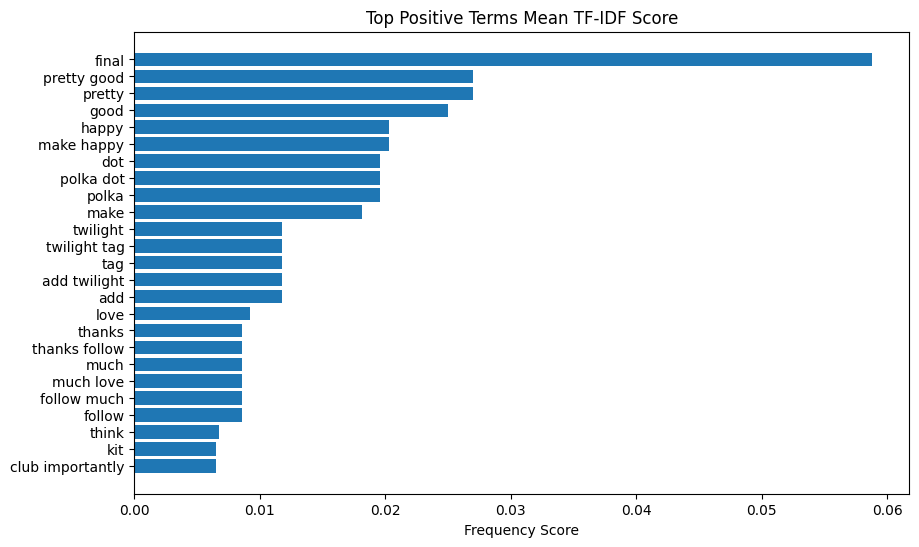

In [ ]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

322


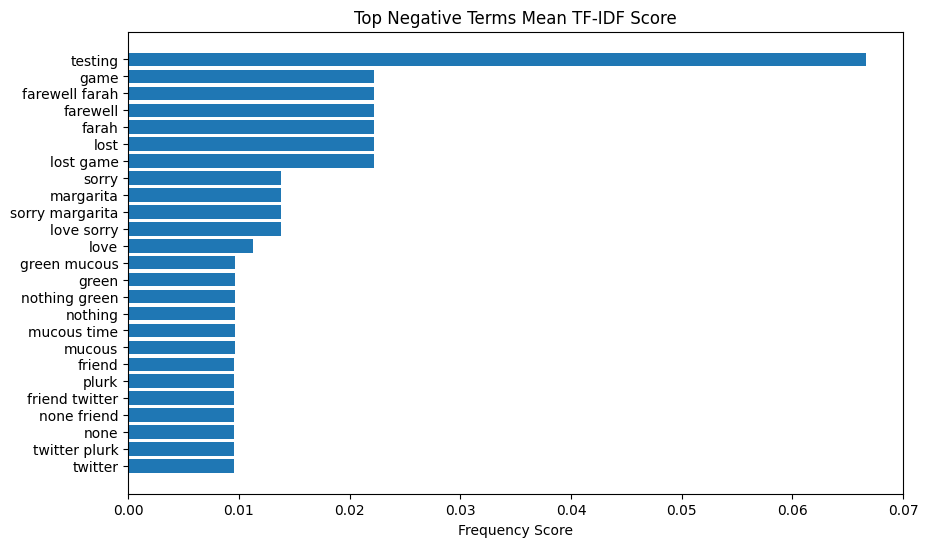

In [ ]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

I got top 'most positive' and 'most negative' terms, manually chose some of them and assigned synonyms.

In [ ]:
# Sort the dataframe by the 'score' column in decreasing order
neg_tf_idf_sorted = neg_tf_idf.sort_values(by='score', ascending=False)
pos_tf_idf_sorted = pos_tf_idf.sort_values(by='score', ascending=False)

# Extract the top 25 terms from the sorted dataframe
top_terms_neg = neg_tf_idf_sorted['terms'].head(25).tolist()
top_terms_pos = pos_tf_idf_sorted['terms'].head(25).tolist()

# Print the list of top 25 terms
print(top_terms_neg)
print(top_terms_pos)

['testing', 'game', 'farewell farah', 'farewell', 'farah', 'lost', 'lost game', 'sorry', 'margarita', 'sorry margarita', 'love sorry', 'love', 'green mucous', 'green', 'nothing green', 'nothing', 'mucous time', 'mucous', 'friend', 'plurk', 'friend twitter', 'none friend', 'none', 'twitter plurk', 'twitter']
['final', 'pretty good', 'pretty', 'good', 'happy', 'make happy', 'dot', 'polka dot', 'polka', 'make', 'twilight', 'twilight tag', 'tag', 'add twilight', 'add', 'love', 'thanks', 'thanks follow', 'much', 'much love', 'follow much', 'follow', 'think', 'kit', 'club importantly']


In [ ]:
synonyms = {
    'school': ['education', 'academy'],
    'complicated': ['complex', 'difficult'],
    'bad': ['poor', 'negative', 'awful', 'lousy', 'rough'],
    'love': ['affection', 'adore', 'care for', 'like'],
    'guilty': ['regret', 'remorse'],
    'feel': ['emotion', 'vibe'],
    'oh': ['ah', 'ahh', 'oops'],
    'miss': ['long for', 'crave', 'feel loss'],
    'going': ['departing', 'leaving', 'traveling'],
    'dear': ['beloved', 'darling', 'precious'],
    'busy': ['occupied', 'engaged'],
    'working': ['laboring', 'employed'],
    'time': ['period', 'duration', 'interval'],
    'would': ['could', 'might', 'will'],
    'look': ['gaze', 'observe', 'glance'],
    'bed time': ['sleep time', 'rest time', 'night time'],
    'song': ['music', 'melody', 'tune'],
    'hi': ['hello', 'hey', 'greetings'],
    'love song': ['romantic music', 'passionate tune'],
    'want': ['desire', 'wish for', 'crave'],
    'please': ['kindly', 'if you please'],
}

In [ ]:
# Function to replace key word with a random synonym
def replace_with_synonym(text, synonyms_dict):
    words = text.split()
    for i, word in enumerate(words):
        if word in synonyms_dict:
            synonyms = synonyms_dict[word]
            # Randomly select a synonym
            new_word = random.choice(synonyms)
            # Replace the key word with the selected synonym
            words[i] = new_word
    return ' '.join(words)

# Initialize an empty DataFrame to store new observations
new_rows = pd.DataFrame(columns=df_train_32.columns)

# Generate additional 50 rows
while len(new_rows) < 50:
    # Identify rows with words from synonyms dictionary
    relevant_rows = df_train_32[df_train_32['clean_text'].apply(lambda x: any(word in synonyms for word in x.split()))]
    # Duplicate each relevant row and replace key word with synonym
    for idx, row in relevant_rows.iterrows():
        new_row = row.copy()
        new_row['clean_text'] = replace_with_synonym(row['clean_text'], synonyms)
        new_rows = new_rows.append(new_row, ignore_index=True)
        if len(new_rows) >= 50:
            break

# Display the new DataFrame with 50 new rows
print(new_rows)


                                                 text label text_length  \
0   @noirem I read it a long time ago but I don't ...     1          23   
1   @raamdev I'll practice with you!  Irene might ...     1          19   
2   I have 1742 message in my gustbook at www.dogu...     1          17   
3               nothing but green mucous all the time     0           7   
4   @princessPK420 we love you too sorry you can't...     0          13   
5      @design_group thanks for the follow! much love     1           7   
6   @dukefan112 even feel like June yet, i still f...     0          21   
7   @JoeTheProducer seriously, go out on the town ...     1          27   
8   @noirem I read it a long time ago but I don't ...     1          23   
9   @raamdev I'll practice with you!  Irene might ...     1          19   
10  I have 1742 message in my gustbook at www.dogu...     1          17   
11              nothing but green mucous all the time     0           7   
12  @princessPK420 we lov

<ipython-input-132-5dc4f9f0cb87>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


In [ ]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame shape
print(augmented_df.shape)

(82, 7)


In [ ]:
# Define data and labels
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

Note, that we will work with the same BERT model, so I will not change anything in the model architecture.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

from keras.callbacks import EarlyStopping
bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# # Now, pass the wrapped generator to fit
history = bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)




Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/7




Epoch:  50%|█████     | 1/2 [00:24<00:24, 24.29s/it]

1/2 [==============>...............] - ETA: 38s - loss: 0.1246 - recall_2: 0.9688 - precision_2: 0.9688



Epoch: 3it [00:38, 11.46s/it]                       

2/2 [==============================] - 39s 420ms/step - loss: 0.2146 - recall_2: 0.9219 - precision_2: 0.9219
Epoch 2/7




Epoch: 4it [00:38,  7.64s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0463 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 5it [00:38,  5.18s/it]

2/2 [==============================] - 0s 268ms/step - loss: 0.1348 - recall_2: 0.9400 - precision_2: 0.9400
Epoch 3/7




Epoch: 6it [00:39,  3.60s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0622 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 7it [00:39,  2.56s/it]

2/2 [==============================] - 0s 212ms/step - loss: 0.1466 - recall_2: 0.9800 - precision_2: 0.9800
Epoch 4/7




Epoch: 8it [00:39,  1.83s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 9it [00:39,  1.35s/it]

2/2 [==============================] - 1s 272ms/step - loss: 0.0100 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 5/7




Epoch: 10it [00:40,  1.02s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0205 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 11it [00:40,  1.29it/s]

2/2 [==============================] - 0s 269ms/step - loss: 0.0108 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 6/7




Epoch: 12it [00:40,  1.61it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 13it [00:40,  1.94it/s]

2/2 [==============================] - 0s 172ms/step - loss: 0.0052 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 7/7




Epoch: 14it [00:41,  2.42it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.0013 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 15it [00:41,  2.73it/s]

2/2 [==============================] - 1s 278ms/step - loss: 0.0012 - recall_2: 1.0000 - precision_2: 1.0000


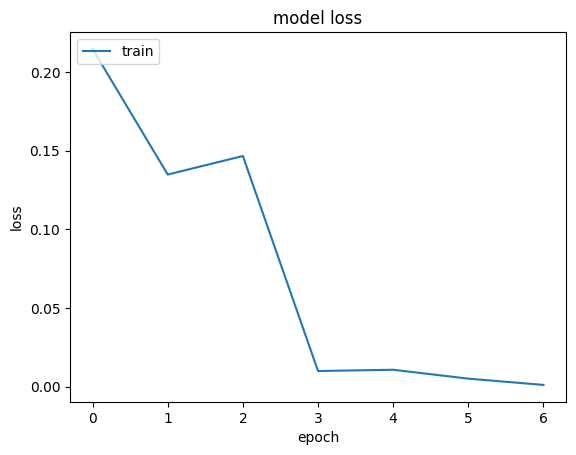

In [ ]:
# Skip the first 10 epochs (index 0 to 9) and start plotting from the 11th epoch (index 10)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Adjusted the legend to include both 'train' and 'val' for clarity
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


582/582 [==============================] - 54s 87ms/step


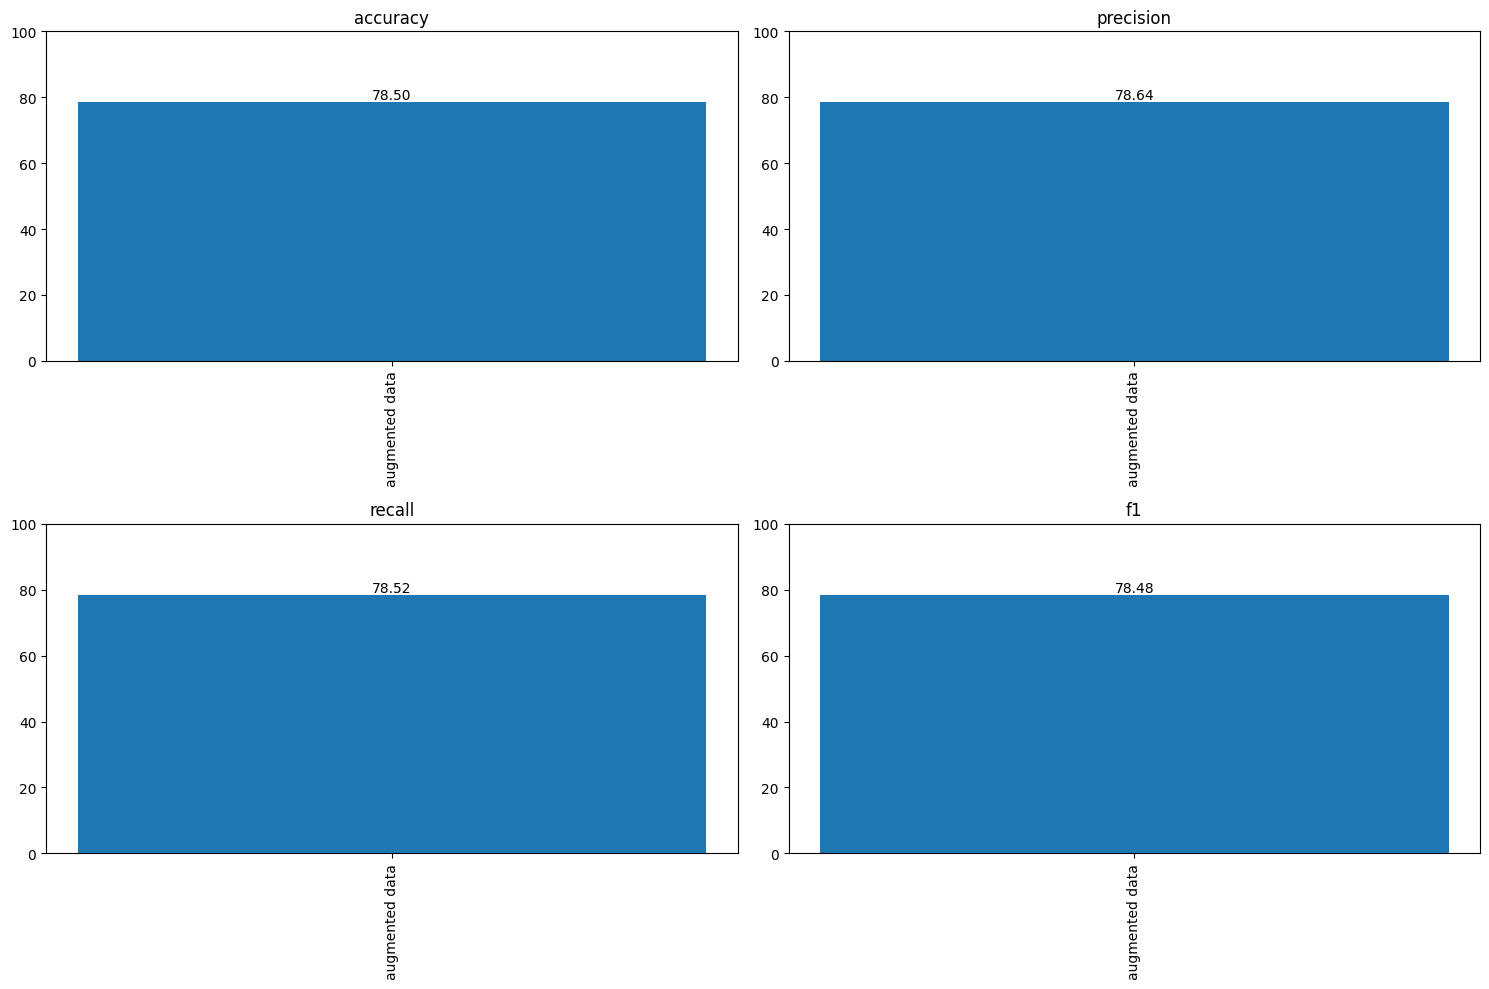

In [ ]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "augmented data")
metrics_val.plot()

### Data Augmentation: Synonyms from WordNet

I didn't choose to work with WordNet packages in the beginning, as far as synonyms look kind of random and don't usually properly reflect the meaning of the word (probably because of multiple meanings) and don't consider the context. But as far as I couldn't manually assign synonyms to all (or at least many) tokens, I decided to try WordNet as well.

So the second approach is to rendomly change 30% of the tokens in the comments (I tried different shares, 30% performed better) and add 32*20 (tried different numbers as well) new rows.

In [ ]:
# Function to get synonyms from WordNet
def get_wordnet_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to replace random words with WordNet synonyms
def replace_with_synonym_wordnet(text):
    words = text.split()
    for i, word in enumerate(words):
        # Randomly decide whether to replace the word with a synonym
        if random.random() < 0.3:  # Adjust the probability as needed
            # Get WordNet synonyms for the word
            synonyms = get_wordnet_synonyms(word)
            if synonyms:
                # Randomly select a synonym
                new_word = random.choice(synonyms)
                # Replace the word with the selected synonym
                words[i] = new_word
    return ' '.join(words)

# Duplicate each row and replace random words with WordNet synonyms
new_rows = pd.DataFrame(columns=df_train_32.columns)
for idx, row in df_train_32.iterrows():
    for _ in range(20):  # Duplicate 20 times - can be adjusted as needed
        # Duplicate the row
        new_row = row.copy()
        # Replace random words in the 'clean_text' column with WordNet synonyms
        new_row['clean_text'] = replace_with_synonym_wordnet(row['clean_text'])
        # Append the new row to the DataFrame
        new_rows = new_rows.append(new_row, ignore_index=True)

# Display the new DataFrame with duplicated rows and random word replacements
print(new_rows.head())


<ipython-input-140-a44f8c0859a0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


                                                text label text_length  \
0  Ever something unbelievable, strange or weird ...     1          18   
1  Ever something unbelievable, strange or weird ...     1          18   
2  Ever something unbelievable, strange or weird ...     1          18   
3  Ever something unbelievable, strange or weird ...     1          18   
4  Ever something unbelievable, strange or weird ...     1          18   

                                          clean_text clean_emotions hashtag  \
0  ever something unbelievable , strange or weird...                          
1  ever something unbelievable , strange or Weird...                          
2  e'er something unbelievable , strange or weird...                          
3  always something unbelievable , strange or wei...                          
4  ever something unbelievable , strange or uncan...                          

                                        text_emotion  
0  ever something unbelie

From the printed first rows you actually may see (comparing text and clean text, which was duplicated), that synonyms are kind of weird.

In [ ]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame
print(augmented_df.shape)

(672, 7)


In [ ]:
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
#bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)

history = bert_model.fit(batches_with_progress, epochs=10, steps_per_epoch=steps_per_epoch)





Epoch:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 1/10





Epoch:   5%|▍         | 1/21 [00:24<08:03, 24.20s/it]

 1/21 [>.............................] - ETA: 12:39 - loss: 0.0058 - recall_3: 1.0000 - precision_3: 1.0000




Epoch:  14%|█▍        | 3/21 [00:38<03:25, 11.41s/it]

 2/21 [=>............................] - ETA: 6s - loss: 0.0771 - recall_3: 0.9688 - precision_3: 0.9688   




Epoch:  19%|█▉        | 4/21 [00:38<02:08,  7.58s/it]

 3/21 [===>..........................] - ETA: 6s - loss: 0.0971 - recall_3: 0.9688 - precision_3: 0.9688




Epoch:  24%|██▍       | 5/21 [00:38<01:23,  5.19s/it]

 4/21 [====>.........................] - ETA: 5s - loss: 0.0815 - recall_3: 0.9688 - precision_3: 0.9688




Epoch:  29%|██▊       | 6/21 [00:39<00:54,  3.64s/it]

 5/21 [======>.......................] - ETA: 5s - loss: 0.0687 - recall_3: 0.9750 - precision_3: 0.9750




Epoch:  33%|███▎      | 7/21 [00:39<00:36,  2.58s/it]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0618 - recall_3: 0.9740 - precision_3: 0.9740




Epoch:  38%|███▊      | 8/21 [00:39<00:24,  1.87s/it]

 7/21 [=========>....................] - ETA: 4s - loss: 0.0534 - recall_3: 0.9777 - precision_3: 0.9777




Epoch:  43%|████▎     | 9/21 [00:39<00:16,  1.38s/it]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0635 - recall_3: 0.9766 - precision_3: 0.9766




Epoch:  48%|████▊     | 10/21 [00:40<00:11,  1.04s/it]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0571 - recall_3: 0.9792 - precision_3: 0.9792




Epoch:  52%|█████▏    | 11/21 [00:40<00:08,  1.25it/s]

10/21 [=============>................] - ETA: 3s - loss: 0.0517 - recall_3: 0.9812 - precision_3: 0.9812




Epoch:  57%|█████▋    | 12/21 [00:40<00:06,  1.49it/s]

11/21 [==============>...............] - ETA: 3s - loss: 0.0471 - recall_3: 0.9830 - precision_3: 0.9830




Epoch:  62%|██████▏   | 13/21 [00:41<00:04,  1.82it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0508 - recall_3: 0.9818 - precision_3: 0.9818




Epoch:  67%|██████▋   | 14/21 [00:41<00:03,  2.04it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0478 - recall_3: 0.9832 - precision_3: 0.9832




Epoch:  71%|███████▏  | 15/21 [00:41<00:02,  2.35it/s]

14/21 [===================>..........] - ETA: 2s - loss: 0.0490 - recall_3: 0.9821 - precision_3: 0.9821




Epoch:  76%|███████▌  | 16/21 [00:42<00:01,  2.66it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0473 - recall_3: 0.9833 - precision_3: 0.9833




Epoch:  81%|████████  | 17/21 [00:42<00:01,  2.88it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0463 - recall_3: 0.9824 - precision_3: 0.9824




Epoch:  86%|████████▌ | 18/21 [00:42<00:01,  2.85it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0554 - recall_3: 0.9816 - precision_3: 0.9816




Epoch:  90%|█████████ | 19/21 [00:42<00:00,  3.06it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0630 - recall_3: 0.9809 - precision_3: 0.9809




Epoch:  95%|█████████▌| 20/21 [00:43<00:00,  3.23it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0606 - recall_3: 0.9819 - precision_3: 0.9819




Epoch: 100%|██████████| 21/21 [00:43<00:00,  3.37it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0577 - recall_3: 0.9828 - precision_3: 0.9828




Epoch: 22it [00:43,  3.42it/s]                        

21/21 [==============================] - 44s 296ms/step - loss: 0.0561 - recall_3: 0.9836 - precision_3: 0.9836
Epoch 2/10





Epoch: 23it [00:44,  3.46it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0059 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 24it [00:44,  3.54it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0067 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 25it [00:44,  3.60it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0051 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 26it [00:44,  3.63it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0097 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 27it [00:45,  3.63it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0084 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 28it [00:45,  3.66it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0083 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 29it [00:45,  3.72it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0078 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 30it [00:45,  3.68it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0072 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 31it [00:46,  3.66it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0066 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 32it [00:46,  3.65it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0067 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 33it [00:46,  3.71it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0062 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 34it [00:46,  3.68it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0060 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 35it [00:47,  3.65it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0216 - recall_3: 0.9952 - precision_3: 0.9952




Epoch: 36it [00:47,  3.36it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0202 - recall_3: 0.9955 - precision_3: 0.9955




Epoch: 37it [00:47,  3.47it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0190 - recall_3: 0.9958 - precision_3: 0.9958




Epoch: 38it [00:48,  3.55it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0210 - recall_3: 0.9941 - precision_3: 0.9941




Epoch: 39it [00:48,  3.64it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0200 - recall_3: 0.9945 - precision_3: 0.9945




Epoch: 40it [00:48,  3.61it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0189 - recall_3: 0.9948 - precision_3: 0.9948




Epoch: 41it [00:48,  3.66it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0180 - recall_3: 0.9951 - precision_3: 0.9951




Epoch: 42it [00:49,  3.66it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0173 - recall_3: 0.9953 - precision_3: 0.9953




Epoch: 43it [00:49,  3.72it/s]

21/21 [==============================] - 6s 275ms/step - loss: 0.0165 - recall_3: 0.9955 - precision_3: 0.9955
Epoch 3/10





Epoch: 44it [00:49,  3.64it/s]

 1/21 [>.............................] - ETA: 5s - loss: 5.4132e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 45it [00:50,  3.70it/s]

 2/21 [=>............................] - ETA: 5s - loss: 5.9913e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 46it [00:50,  3.69it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0032 - recall_3: 1.0000 - precision_3: 1.0000    




Epoch: 47it [00:50,  3.70it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0026 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 48it [00:50,  3.67it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0022 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 49it [00:51,  3.69it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0019 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 50it [00:51,  3.69it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0017 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 51it [00:51,  3.73it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0015 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 52it [00:51,  3.75it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0014 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 53it [00:52,  3.72it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 54it [00:52,  3.69it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0025 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 55it [00:52,  3.73it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0024 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 56it [00:53,  3.70it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0022 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 57it [00:53,  3.69it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0021 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 58it [00:53,  3.72it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 59it [00:53,  3.70it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0021 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 60it [00:54,  3.71it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 61it [00:54,  3.72it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0019 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 62it [00:54,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0018 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 63it [00:54,  3.73it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0018 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 64it [00:55,  3.70it/s]

21/21 [==============================] - 6s 270ms/step - loss: 0.0023 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 4/10





Epoch: 65it [00:55,  3.67it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0042 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 66it [00:55,  3.71it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0025 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 67it [00:55,  3.70it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0017 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 68it [00:56,  3.66it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 69it [00:56,  3.69it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 70it [00:56,  3.69it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 9.4948e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 71it [00:57,  3.69it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 8.6859e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 72it [00:57,  3.70it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 7.9619e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 73it [00:57,  3.68it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 7.3231e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 74it [00:57,  3.71it/s]

10/21 [=============>................] - ETA: 2s - loss: 8.0923e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 75it [00:58,  3.68it/s]

11/21 [==============>...............] - ETA: 2s - loss: 7.4902e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 76it [00:58,  3.71it/s]

12/21 [================>.............] - ETA: 2s - loss: 7.5500e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 77it [00:58,  3.70it/s]

13/21 [=================>............] - ETA: 2s - loss: 7.1095e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 78it [00:58,  3.69it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0095 - recall_3: 0.9978 - precision_3: 0.9978    




Epoch: 79it [00:59,  3.70it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0089 - recall_3: 0.9979 - precision_3: 0.9979




Epoch: 80it [00:59,  3.71it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0084 - recall_3: 0.9980 - precision_3: 0.9980




Epoch: 81it [00:59,  3.71it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0079 - recall_3: 0.9982 - precision_3: 0.9982




Epoch: 82it [01:00,  3.70it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0075 - recall_3: 0.9983 - precision_3: 0.9983




Epoch: 83it [01:00,  3.70it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0071 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 84it [01:00,  3.66it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0068 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 85it [01:00,  3.65it/s]

21/21 [==============================] - 6s 272ms/step - loss: 0.0065 - recall_3: 0.9985 - precision_3: 0.9985
Epoch 5/10





Epoch: 86it [01:01,  3.63it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0024 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 87it [01:01,  3.67it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0132 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 88it [01:01,  3.68it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0440 - recall_3: 0.9896 - precision_3: 0.9896




Epoch: 89it [01:01,  3.65it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0333 - recall_3: 0.9922 - precision_3: 0.9922




Epoch: 90it [01:02,  3.68it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0267 - recall_3: 0.9937 - precision_3: 0.9937




Epoch: 91it [01:02,  3.67it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0222 - recall_3: 0.9948 - precision_3: 0.9948




Epoch: 92it [01:02,  3.66it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0191 - recall_3: 0.9955 - precision_3: 0.9955




Epoch: 93it [01:03,  3.67it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0168 - recall_3: 0.9961 - precision_3: 0.9961




Epoch: 94it [01:03,  3.67it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0149 - recall_3: 0.9965 - precision_3: 0.9965




Epoch: 95it [01:03,  3.64it/s]

10/21 [=============>................] - ETA: 3s - loss: 0.0136 - recall_3: 0.9969 - precision_3: 0.9969




Epoch: 96it [01:03,  3.66it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0124 - recall_3: 0.9972 - precision_3: 0.9972




Epoch: 97it [01:04,  3.68it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0114 - recall_3: 0.9974 - precision_3: 0.9974




Epoch: 98it [01:04,  3.68it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0106 - recall_3: 0.9976 - precision_3: 0.9976




Epoch: 99it [01:04,  3.67it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0102 - recall_3: 0.9978 - precision_3: 0.9978




Epoch: 100it [01:04,  3.68it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0097 - recall_3: 0.9979 - precision_3: 0.9979




Epoch: 101it [01:05,  3.68it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0091 - recall_3: 0.9980 - precision_3: 0.9980




Epoch: 102it [01:05,  3.66it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0086 - recall_3: 0.9982 - precision_3: 0.9982




Epoch: 103it [01:05,  3.65it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0081 - recall_3: 0.9983 - precision_3: 0.9983




Epoch: 104it [01:06,  3.65it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0094 - recall_3: 0.9967 - precision_3: 0.9967




Epoch: 105it [01:06,  3.65it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0089 - recall_3: 0.9969 - precision_3: 0.9969




Epoch: 106it [01:06,  3.64it/s]

21/21 [==============================] - 6s 278ms/step - loss: 0.0085 - recall_3: 0.9970 - precision_3: 0.9970
Epoch 6/10





Epoch: 107it [01:06,  3.31it/s]

 1/21 [>.............................] - ETA: 5s - loss: 3.9161e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 108it [01:07,  3.44it/s]

 2/21 [=>............................] - ETA: 5s - loss: 2.7946e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 109it [01:07,  3.52it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 2.4160e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 110it [01:07,  3.57it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 4.4273e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 111it [01:08,  3.54it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 4.1214e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 112it [01:08,  3.58it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 5.9543e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 113it [01:08,  3.59it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 5.5123e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 114it [01:08,  3.60it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 5.6503e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 115it [01:09,  3.61it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 5.7693e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 116it [01:09,  3.63it/s]

10/21 [=============>................] - ETA: 3s - loss: 6.2051e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 117it [01:09,  3.59it/s]

11/21 [==============>...............] - ETA: 2s - loss: 5.7183e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 118it [01:09,  3.61it/s]

12/21 [================>.............] - ETA: 2s - loss: 5.3075e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 119it [01:10,  3.59it/s]

13/21 [=================>............] - ETA: 2s - loss: 4.9413e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 120it [01:10,  3.59it/s]

14/21 [===================>..........] - ETA: 1s - loss: 4.8683e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 121it [01:10,  3.61it/s]

15/21 [====================>.........] - ETA: 1s - loss: 4.9256e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 122it [01:11,  3.63it/s]

16/21 [=====================>........] - ETA: 1s - loss: 4.7235e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 123it [01:11,  3.63it/s]

17/21 [=======================>......] - ETA: 1s - loss: 4.5964e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 124it [01:11,  3.63it/s]

18/21 [========================>.....] - ETA: 0s - loss: 5.1893e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 125it [01:11,  3.64it/s]

19/21 [==========================>...] - ETA: 0s - loss: 5.0479e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 126it [01:12,  3.62it/s]

20/21 [===========================>..] - ETA: 0s - loss: 5.0353e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 127it [01:12,  3.62it/s]

21/21 [==============================] - 6s 276ms/step - loss: 4.8449e-04 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 7/10





Epoch: 128it [01:12,  3.60it/s]

 1/21 [>.............................] - ETA: 5s - loss: 3.0613e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 129it [01:13,  3.64it/s]

 2/21 [=>............................] - ETA: 5s - loss: 1.8636e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 130it [01:13,  3.65it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 2.0954e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 131it [01:13,  3.66it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 3.0365e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 132it [01:13,  3.65it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 2.9615e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 133it [01:14,  3.67it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 2.8848e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 134it [01:14,  3.68it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 3.2913e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 135it [01:14,  3.68it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 4.8431e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 136it [01:14,  3.68it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 4.5998e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 137it [01:15,  3.68it/s]

10/21 [=============>................] - ETA: 2s - loss: 4.1877e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 138it [01:15,  3.68it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0105 - recall_3: 0.9972 - precision_3: 0.9972    




Epoch: 139it [01:15,  3.68it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0096 - recall_3: 0.9974 - precision_3: 0.9974




Epoch: 140it [01:16,  3.68it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0089 - recall_3: 0.9976 - precision_3: 0.9976




Epoch: 141it [01:16,  3.69it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0083 - recall_3: 0.9978 - precision_3: 0.9978




Epoch: 142it [01:16,  3.69it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0078 - recall_3: 0.9979 - precision_3: 0.9979




Epoch: 143it [01:16,  3.69it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0083 - recall_3: 0.9980 - precision_3: 0.9980




Epoch: 144it [01:17,  3.70it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0078 - recall_3: 0.9982 - precision_3: 0.9982




Epoch: 145it [01:17,  3.70it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0074 - recall_3: 0.9983 - precision_3: 0.9983




Epoch: 146it [01:17,  3.70it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0070 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 147it [01:17,  3.70it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0067 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 148it [01:18,  3.71it/s]

21/21 [==============================] - 6s 272ms/step - loss: 0.0065 - recall_3: 0.9985 - precision_3: 0.9985
Epoch 8/10





Epoch: 149it [01:18,  3.64it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0122 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 150it [01:18,  3.68it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0085 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 151it [01:18,  3.69it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0057 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 152it [01:19,  3.70it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0044 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 153it [01:19,  3.69it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0035 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 154it [01:19,  3.71it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0030 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 155it [01:20,  3.72it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0026 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 156it [01:20,  3.67it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0023 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 157it [01:20,  3.66it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 158it [01:20,  3.69it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0018 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 159it [01:21,  3.71it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0017 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 160it [01:21,  3.69it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0016 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 161it [01:21,  3.71it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0015 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 162it [01:21,  3.72it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0014 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 163it [01:22,  3.73it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 164it [01:22,  3.73it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0012 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 165it [01:22,  3.73it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0012 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 166it [01:23,  3.73it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0012 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 167it [01:23,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 168it [01:23,  3.74it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 169it [01:23,  3.71it/s]

21/21 [==============================] - 6s 269ms/step - loss: 0.0010 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 9/10





Epoch: 170it [01:24,  3.70it/s]

 1/21 [>.............................] - ETA: 5s - loss: 8.3876e-05 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 171it [01:24,  3.72it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0029 - recall_3: 1.0000 - precision_3: 1.0000    




Epoch: 172it [01:24,  3.71it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 173it [01:24,  3.72it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0016 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 174it [01:25,  3.73it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 175it [01:25,  3.73it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 176it [01:25,  3.73it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 9.9095e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 177it [01:25,  3.74it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 8.8553e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 178it [01:26,  3.74it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 7.9436e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 179it [01:26,  3.74it/s]

10/21 [=============>................] - ETA: 2s - loss: 7.3093e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 180it [01:26,  3.73it/s]

11/21 [==============>...............] - ETA: 2s - loss: 6.7424e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 181it [01:27,  3.73it/s]

12/21 [================>.............] - ETA: 2s - loss: 6.3063e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 182it [01:27,  3.74it/s]

13/21 [=================>............] - ETA: 2s - loss: 5.8900e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 183it [01:27,  3.75it/s]

14/21 [===================>..........] - ETA: 1s - loss: 5.5942e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 184it [01:27,  3.75it/s]

15/21 [====================>.........] - ETA: 1s - loss: 5.3008e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 185it [01:28,  3.75it/s]

16/21 [=====================>........] - ETA: 1s - loss: 5.0537e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 186it [01:28,  3.73it/s]

17/21 [=======================>......] - ETA: 1s - loss: 4.9183e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 187it [01:28,  3.72it/s]

18/21 [========================>.....] - ETA: 0s - loss: 5.0114e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 188it [01:28,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 4.7650e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 189it [01:29,  3.73it/s]

20/21 [===========================>..] - ETA: 0s - loss: 4.5401e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 190it [01:29,  3.75it/s]

21/21 [==============================] - 6s 268ms/step - loss: 4.3591e-04 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 10/10





Epoch: 191it [01:29,  3.70it/s]

 1/21 [>.............................] - ETA: 5s - loss: 5.3749e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 192it [01:29,  3.73it/s]

 2/21 [=>............................] - ETA: 5s - loss: 2.8351e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 193it [01:30,  3.74it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 2.3489e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 194it [01:30,  3.75it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 1.8025e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 195it [01:30,  3.74it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 1.9635e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 196it [01:31,  3.75it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 1.7042e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 197it [01:31,  3.73it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 1.5122e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 198it [01:31,  3.75it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 1.6326e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 199it [01:31,  3.75it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 1.6840e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 200it [01:32,  3.76it/s]

10/21 [=============>................] - ETA: 2s - loss: 1.5382e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 201it [01:32,  3.78it/s]

11/21 [==============>...............] - ETA: 2s - loss: 1.4509e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 202it [01:32,  3.74it/s]

12/21 [================>.............] - ETA: 2s - loss: 1.3702e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 203it [01:32,  3.76it/s]

13/21 [=================>............] - ETA: 2s - loss: 1.3238e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 204it [01:33,  3.77it/s]

14/21 [===================>..........] - ETA: 1s - loss: 1.2625e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 205it [01:33,  3.71it/s]

15/21 [====================>.........] - ETA: 1s - loss: 1.3256e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 206it [01:33,  3.74it/s]

16/21 [=====================>........] - ETA: 1s - loss: 1.3149e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 207it [01:33,  3.75it/s]

17/21 [=======================>......] - ETA: 1s - loss: 1.3029e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 208it [01:34,  3.72it/s]

18/21 [========================>.....] - ETA: 0s - loss: 1.2814e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 209it [01:34,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 1.2242e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 210it [01:34,  3.76it/s]

20/21 [===========================>..] - ETA: 0s - loss: 1.1832e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 211it [01:35,  3.76it/s]

21/21 [==============================] - 6s 267ms/step - loss: 1.1639e-04 - recall_3: 1.0000 - precision_3: 1.0000


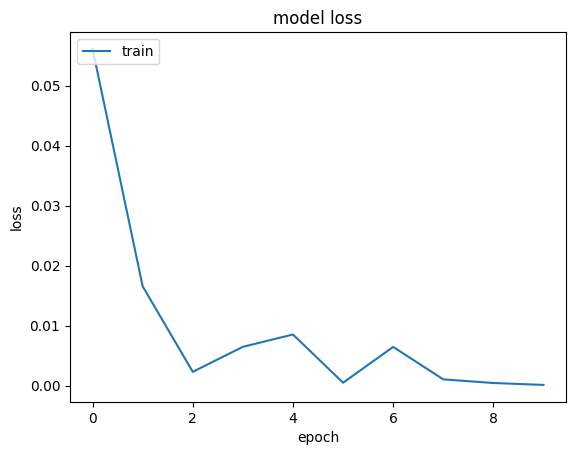

In [ ]:
# Skip the first 10 epochs (index 0 to 9) and start plotting from the 11th epoch (index 10)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Adjusted the legend to include both 'train' and 'val' for clarity
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


582/582 [==============================] - 53s 86ms/step


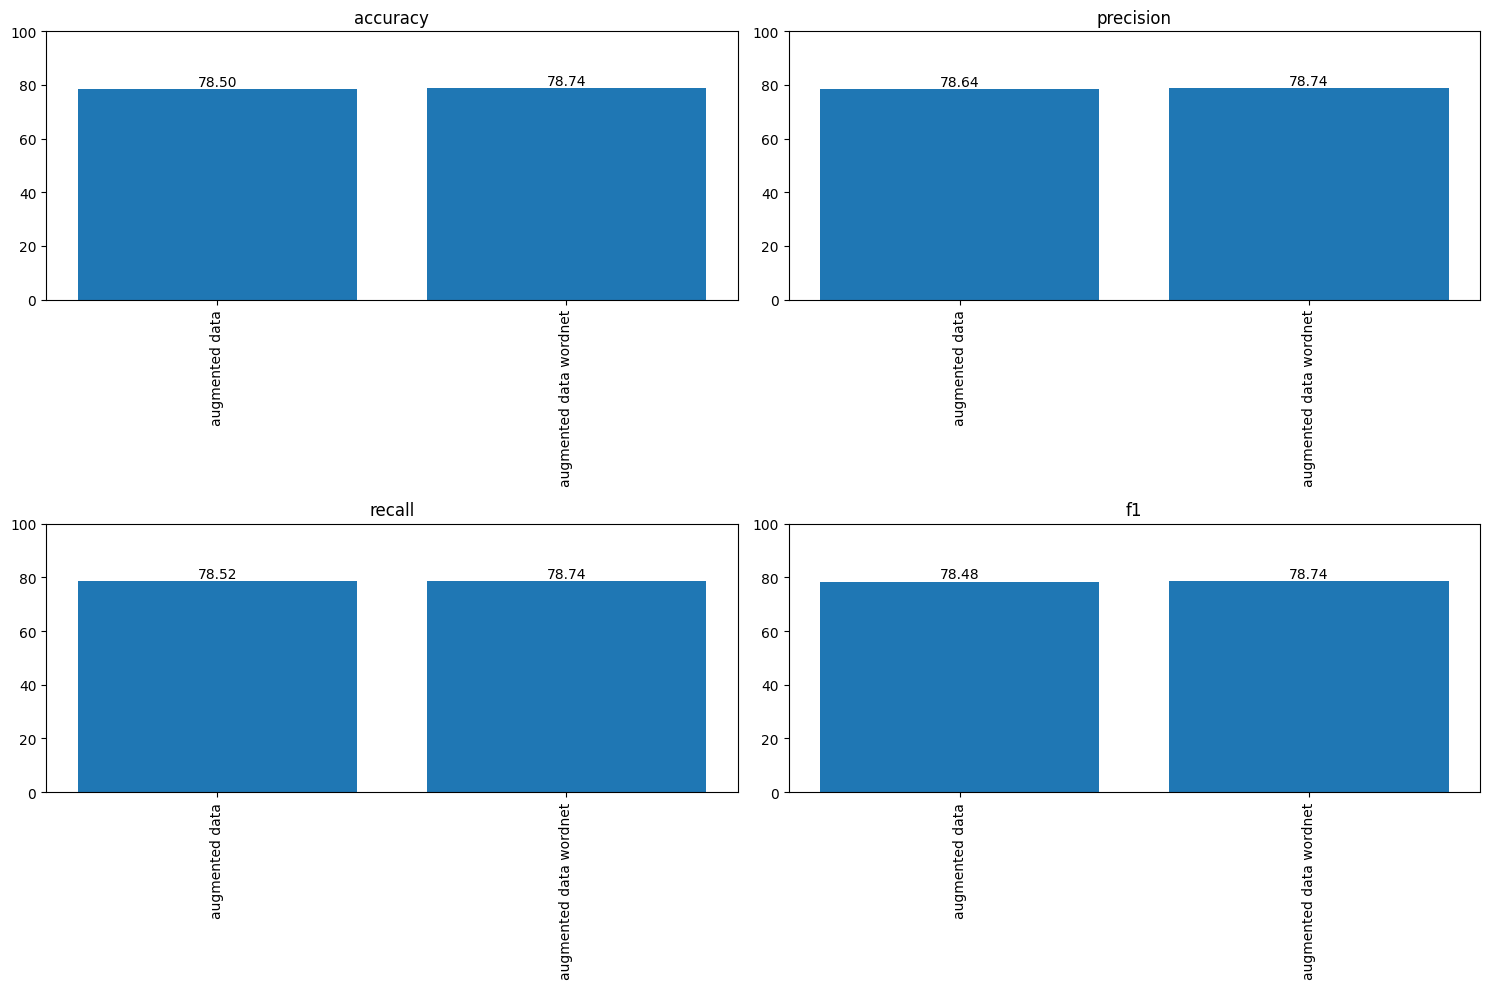

In [ ]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "augmented data wordnet")
metrics_val.plot()

# Zero Shot LLM

In [ ]:
import random
from transformers import pipeline

model_name = "facebook/bart-large-mnli"  # Adjust model name as needed

# # Combine the elements from both lists
# combined_list = list(zip(validation_data, validation_labels))

# # Shuffle the combined list
# random.shuffle(combined_list)

# # Get the random sample from the combined list
# sample_size = 300  # Define the size of the sample
# random_sample = random.sample(combined_list, sample_size)

# # Separate the sampled elements back into separate lists
# sampled_list1, sampled_list2 = zip(*random_sample)

# print("Sampled elements from list1:", sampled_list1)
# print("Sampled elements from list2:", sampled_list2)

df_val_sampled = df_val.sample(n=300, random_state=42)
sampled_list1 = (df_val_sampled['text']).tolist()

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model=model_name)

# Define the candidate labels
candidate_labels = ['positive', 'negative']

# Store the predictions for each item in a list
predictions = []

# Iterate over each text sample in test_data
for text_sample in sampled_list1:
    # Use the classifier pipeline to predict the label
    result = classifier(text_sample, candidate_labels)

    # Get the label with the highest score
    if result['scores'][0] >= result['scores'][1]:
        predicted_label = result['labels'][0]
    else:
        predicted_label = result['labels'][1]

    # Append the predicted label to the predictions list
    predictions.append(predicted_label)

# Print the predictions
print(predictions)

['negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'ne

In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(validation_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


94/94 [==============================] - 8s 73ms/step


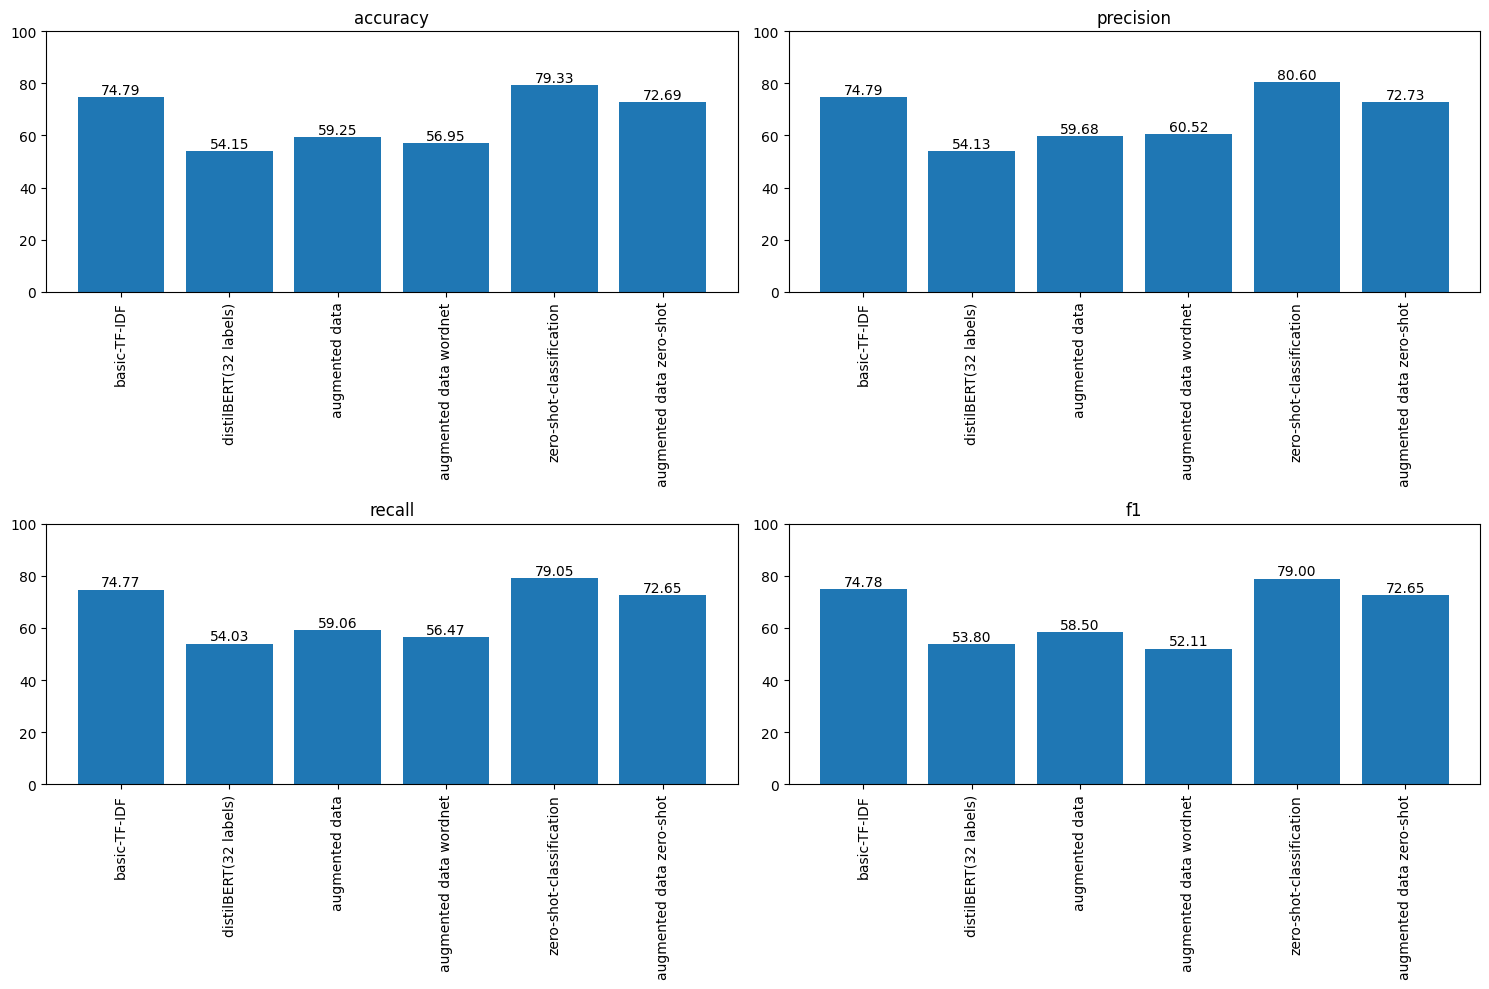

In [ ]:
# get the final metrics
metrics_val.run(validation_labels, valid_preds, "augmented data zero-shot")
metrics_val.plot()

In [ ]:
import random
from transformers import pipeline

model_name = "databricks/dolly-v2-12b"  # Adjust model name as needed

# # Combine the elements from both lists
# combined_list = list(zip(validation_data, validation_labels))

# # Shuffle the combined list
# random.shuffle(combined_list)

# # Get the random sample from the combined list
# sample_size = 300  # Define the size of the sample
# random_sample = random.sample(combined_list, sample_size)

# # Separate the sampled elements back into separate lists
# sampled_list1, sampled_list2 = zip(*random_sample)

# print("Sampled elements from list1:", sampled_list1)
# print("Sampled elements from list2:", sampled_list2)

df_val_sampled = df_val.sample(n=300, random_state=42)
sampled_list1 = (df_val_sampled['text']).tolist()

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model=model_name)

# Define the candidate labels
candidate_labels = ['positive', 'negative']

# Store the predictions for each item in a list
predictions = []

# Iterate over each text sample in test_data
for text_sample in sampled_list1:
    # Use the classifier pipeline to predict the label
    result = classifier(text_sample, candidate_labels)

    # Get the label with the highest score
    if result['scores'][0] >= result['scores'][1]:
        predicted_label = result['labels'][0]
    else:
        predicted_label = result['labels'][1]

    # Append the predicted label to the predictions list
    predictions.append(predicted_label)

# Print the predictions
print(predictions)

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/23.8G [00:00<?, ?B/s]

In [ ]:
zero_predictions = [1 if prediction == 'positive' else 0 for prediction in predictions]

# Update the "label" column with values from sampled_list2
df_val_sampled['label'] = zero_predictions

# Display the updated DataFrame
print(df_val_sampled.head())

# metrics_val.run(sampled_list2, zero_predictions, "zero-shot-classification")
# metrics_val.plot()

In [ ]:
# Add new_rows to df_train_32
augmented_zero_df = pd.concat([df_train_32, df_val_sampled], ignore_index=True)

# Display the augmented DataFrame
print(augmented_zero_df.shape)

In [ ]:
augmented_zero_df_data = augmented_zero_df['clean_text']
augmented_zero_df_label = augmented_zero_df['label']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_zero_df_label).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_zero_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)


In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(validation_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


In [ ]:
# get the final metrics
metrics_val.run(validation_labels, valid_preds, "augmented data zero-shot Roberta")
metrics_val.plot()

---

# Part III